## Flight Price Prediction

### importing the required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
flight=pd.read_excel("flight data.xlsx")
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### checking info of dataset

In [3]:
flight.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

### checking the null values in the columns

In [4]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### checking the categorical columns values and feequency

In [5]:
# top value and frequency
flight.describe(include=object).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


#  feature eng

In [6]:
# airline
flight["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
# date of journey
flight["Date_of_Journey"]=pd.to_datetime(flight["Date_of_Journey"],
               format="%d/%m/%Y")

In [8]:
# day of jorney
flight["Journey_day"]=flight["Date_of_Journey"].dt.day
flight["Journey_weekday"]=flight["Date_of_Journey"].dt.weekday
flight["Journey_month"]=flight["Date_of_Journey"].dt.month

In [9]:
flight["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [10]:
flight["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [11]:
flight["Destination"]=np.where(flight["Destination"]=="New Delhi",
                              "Delhi",flight["Destination"])
# we change the new delhi to delhi without losing the data


In [12]:
flight["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
# route

flight["Route"].value_counts()
# we can categorize the busy ,very busy 
# we can also put the avg value of the  this certain route and put the value of the the route and acc to the avg price for
# the machine learning

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [14]:
busy_routes = flight['Route'].value_counts().head(7).index

In [15]:
# 1 as busy, 0 as no - busy rote

flight["Route"]=flight["Route"].apply(lambda route: 1 if route in busy_routes else 0)

<Axes: xlabel='Route', ylabel='count'>

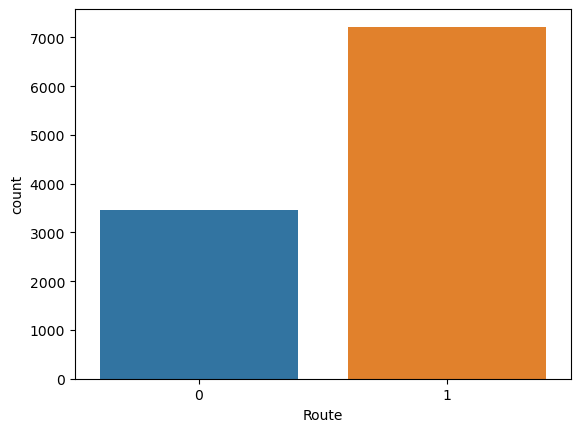

In [16]:
sns.countplot(x=flight["Route"])

In [17]:
flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month
0,IndiGo,2019-03-24,Banglore,Delhi,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,6,3
1,Air India,2019-05-01,Kolkata,Banglore,0,05:50,13:15,7h 25m,2 stops,No info,7662,1,2,5


In [18]:
# dep time and arrv time

flight["Dep_Time"]=pd.to_datetime(flight["Dep_Time"],format="%H:%M")

In [19]:
flight["Dep_Hour"]=flight["Dep_Time"].dt.hour

In [20]:
# 12 am to 6am: Early morning---0
# 6am to 12 noon: morning---1
# 12 6 pm: afternoon--2
# after 6 pm: evening---3
def hour(h):
    if h>0 and h<6:
        return 0
    elif h>6 and h<=12:
        return 1
    elif h>12 and h<=18:
        return 2
    else :
        return 3

In [21]:
flight["Dep_Hour"]=flight["Dep_Hour"].apply(hour)

<Axes: xlabel='Dep_Hour', ylabel='count'>

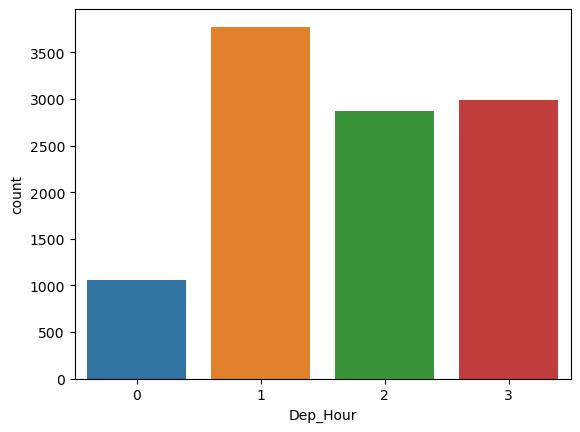

In [22]:
sns.countplot(x=flight["Dep_Hour"])

In [23]:
flight["Arrival_Time"]=pd.to_datetime(flight["Arrival_Time"])

In [24]:
flight["Arrival_hr"]=flight["Arrival_Time"].dt.hour

In [25]:
flight["Arrival_hr"]=flight["Arrival_hr"].apply(hour)

<Axes: xlabel='Arrival_hr', ylabel='count'>

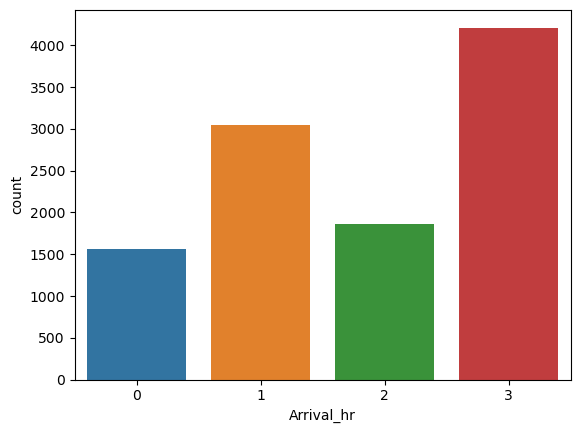

In [26]:
sns.countplot(x=flight["Arrival_hr"])

In [27]:
# duration
flight[["Dur_h","Dur_m"]]=flight["Duration"].str.split(expand=True)

In [28]:
flight[flight["Duration"]=="5m"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr,Dur_h,Dur_m
6474,Air India,2019-03-06,Mumbai,Hyderabad,0,1900-01-01 16:50:00,2024-01-07 16:55:00,5m,2 stops,No info,17327,6,2,3,2,2,5m,None


In [29]:
flight.drop(index=[6474],inplace=True)

In [30]:
flight["Dur_h"]=flight["Dur_h"].str.replace("h",'').astype(int)

In [31]:
flight["Dur_m"]=np.where(flight["Dur_m"].isnull(),"0m",flight["Dur_m"]) # first

In [32]:
flight["Dur_m"]=flight["Dur_m"].str.replace("m","").astype(int)# 2nd

In [33]:
flight["Duration"]=(flight["Dur_h"]*60)+flight["Dur_m"]# 3rd in ccase of error

In [34]:
flight[flight["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr,Dur_h,Dur_m
9039,Air India,2019-05-06,Delhi,Cochin,0,1900-01-01 09:45:00,2024-05-07 09:25:00,1420,NaN,No info,7480,6,0,5,1,1,23,40


In [35]:
flight.drop(index=[9039],inplace=True)

In [36]:
# stops

flight["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
stop_map={"non-stop":0,
         "1 stop":1,
         "2 stops":2,
         "3 stops":3,
         "4 stops":4}
flight["Total_Stops"]=flight["Total_Stops"].map(stop_map)

In [38]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr,Dur_h,Dur_m
0,IndiGo,2019-03-24,Banglore,Delhi,1,1900-01-01 22:20:00,2024-03-22 01:10:00,170,0,No info,3897,24,6,3,3,0,2,50
1,Air India,2019-05-01,Kolkata,Banglore,0,1900-01-01 05:50:00,2024-01-07 13:15:00,445,2,No info,7662,1,2,5,0,2,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,0,1900-01-01 09:25:00,2024-06-10 04:25:00,1140,2,No info,13882,9,6,6,1,0,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,0,1900-01-01 18:05:00,2024-01-07 23:30:00,325,1,No info,6218,12,6,5,2,3,5,25
4,IndiGo,2019-03-01,Banglore,Delhi,0,1900-01-01 16:50:00,2024-01-07 21:35:00,285,1,No info,13302,1,4,3,2,3,4,45


In [39]:
# additional info

flight["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [40]:
# lets make 1---> INfo 0 ---> no INFo

flight["Additional_Info"]=flight["Additional_Info"].apply(lambda x:0 if x in ["No info","No Info"]else 1)

In [41]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr,Dur_h,Dur_m
0,IndiGo,2019-03-24,Banglore,Delhi,1,1900-01-01 22:20:00,2024-03-22 01:10:00,170,0,0,3897,24,6,3,3,0,2,50
1,Air India,2019-05-01,Kolkata,Banglore,0,1900-01-01 05:50:00,2024-01-07 13:15:00,445,2,0,7662,1,2,5,0,2,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,0,1900-01-01 09:25:00,2024-06-10 04:25:00,1140,2,0,13882,9,6,6,1,0,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,0,1900-01-01 18:05:00,2024-01-07 23:30:00,325,1,0,6218,12,6,5,2,3,5,25
4,IndiGo,2019-03-01,Banglore,Delhi,0,1900-01-01 16:50:00,2024-01-07 21:35:00,285,1,0,13302,1,4,3,2,3,4,45


###   We can drop the columns that we don't need anymore

In [42]:
flight.columns
del_columns=['Date_of_Journey','Dep_Time','Arrival_Time', 'Dur_h','Dur_m']

In [43]:
flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr,Dur_h,Dur_m
0,IndiGo,2019-03-24,Banglore,Delhi,1,1900-01-01 22:20:00,2024-03-22 01:10:00,170,0,0,3897,24,6,3,3,0,2,50
1,Air India,2019-05-01,Kolkata,Banglore,0,1900-01-01 05:50:00,2024-01-07 13:15:00,445,2,0,7662,1,2,5,0,2,7,25


In [44]:
flight.drop(columns=del_columns,inplace=True)

In [45]:
print(flight.select_dtypes(include=np.number).columns)

flight_num=[ 'Duration', 'Price','Journey_day']

Index(['Route', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Journey_day', 'Journey_weekday', 'Journey_month', 'Dep_Hour',
       'Arrival_hr'],
      dtype='object')


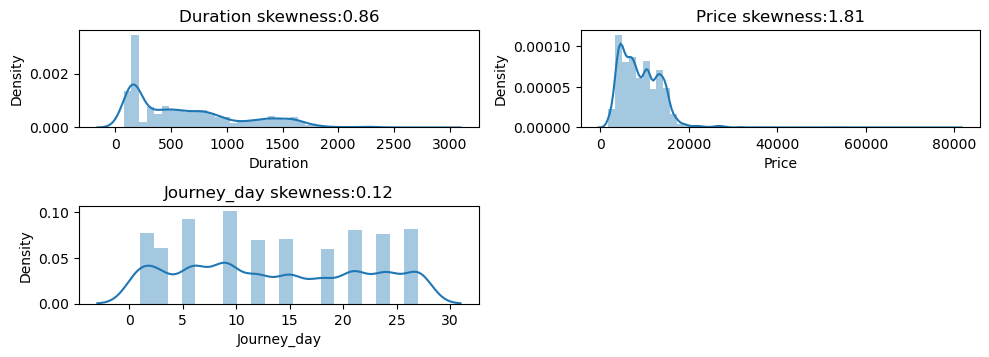

In [46]:
# univariate
repeater=1

plt.figure(figsize=(10,5))
for i in flight_num:
    plt.subplot(3,2,repeater)
    sns.distplot(flight[i])
    plt.title(f'{i} skewness:{round(flight[i].skew(),2)}')
    repeater+=1
plt.tight_layout()
plt.show()


 #### Inferences
 * price(target variable is highly right skewed)
 * Suration also has some skewness on right

In [47]:
flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Route,10681.0,0.675873,0.468070,0.0,0.0,1.0,1.0,1.0
Duration,10681.0,643.080236,507.816377,75.0,170.0,520.0,930.0,2860.0
Total_Stops,10681.0,0.824080,0.675164,0.0,0.0,1.0,1.0,4.0
Additional_Info,10681.0,0.218612,0.413324,0.0,0.0,0.0,0.0,1.0
Price,10681.0,9086.443123,4611.075357,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_day,10681.0,13.509784,8.479449,1.0,6.0,12.0,21.0,27.0
Journey_weekday,10681.0,2.935212,2.006664,0.0,1.0,3.0,5.0,6.0
Journey_month,10681.0,4.708735,1.164345,3.0,3.0,5.0,6.0,6.0
Dep_Hour,10681.0,1.728864,0.976733,0.0,1.0,2.0,3.0,3.0
Arrival_hr,10681.0,1.816497,1.109557,0.0,1.0,2.0,3.0,3.0


In [48]:
flight.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr
0,IndiGo,Banglore,Delhi,1,170,0,0,3897,24,6,3,3,0


In [49]:
flight.select_dtypes(include="object").columns

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [50]:
flight_cat=['Airline','Source', 'Destination', 'Route',
         'Total_Stops',"Additional_Info", 'Journey_weekday', 'Journey_month', 'Dep_Hour',
       'Arrival_hr']

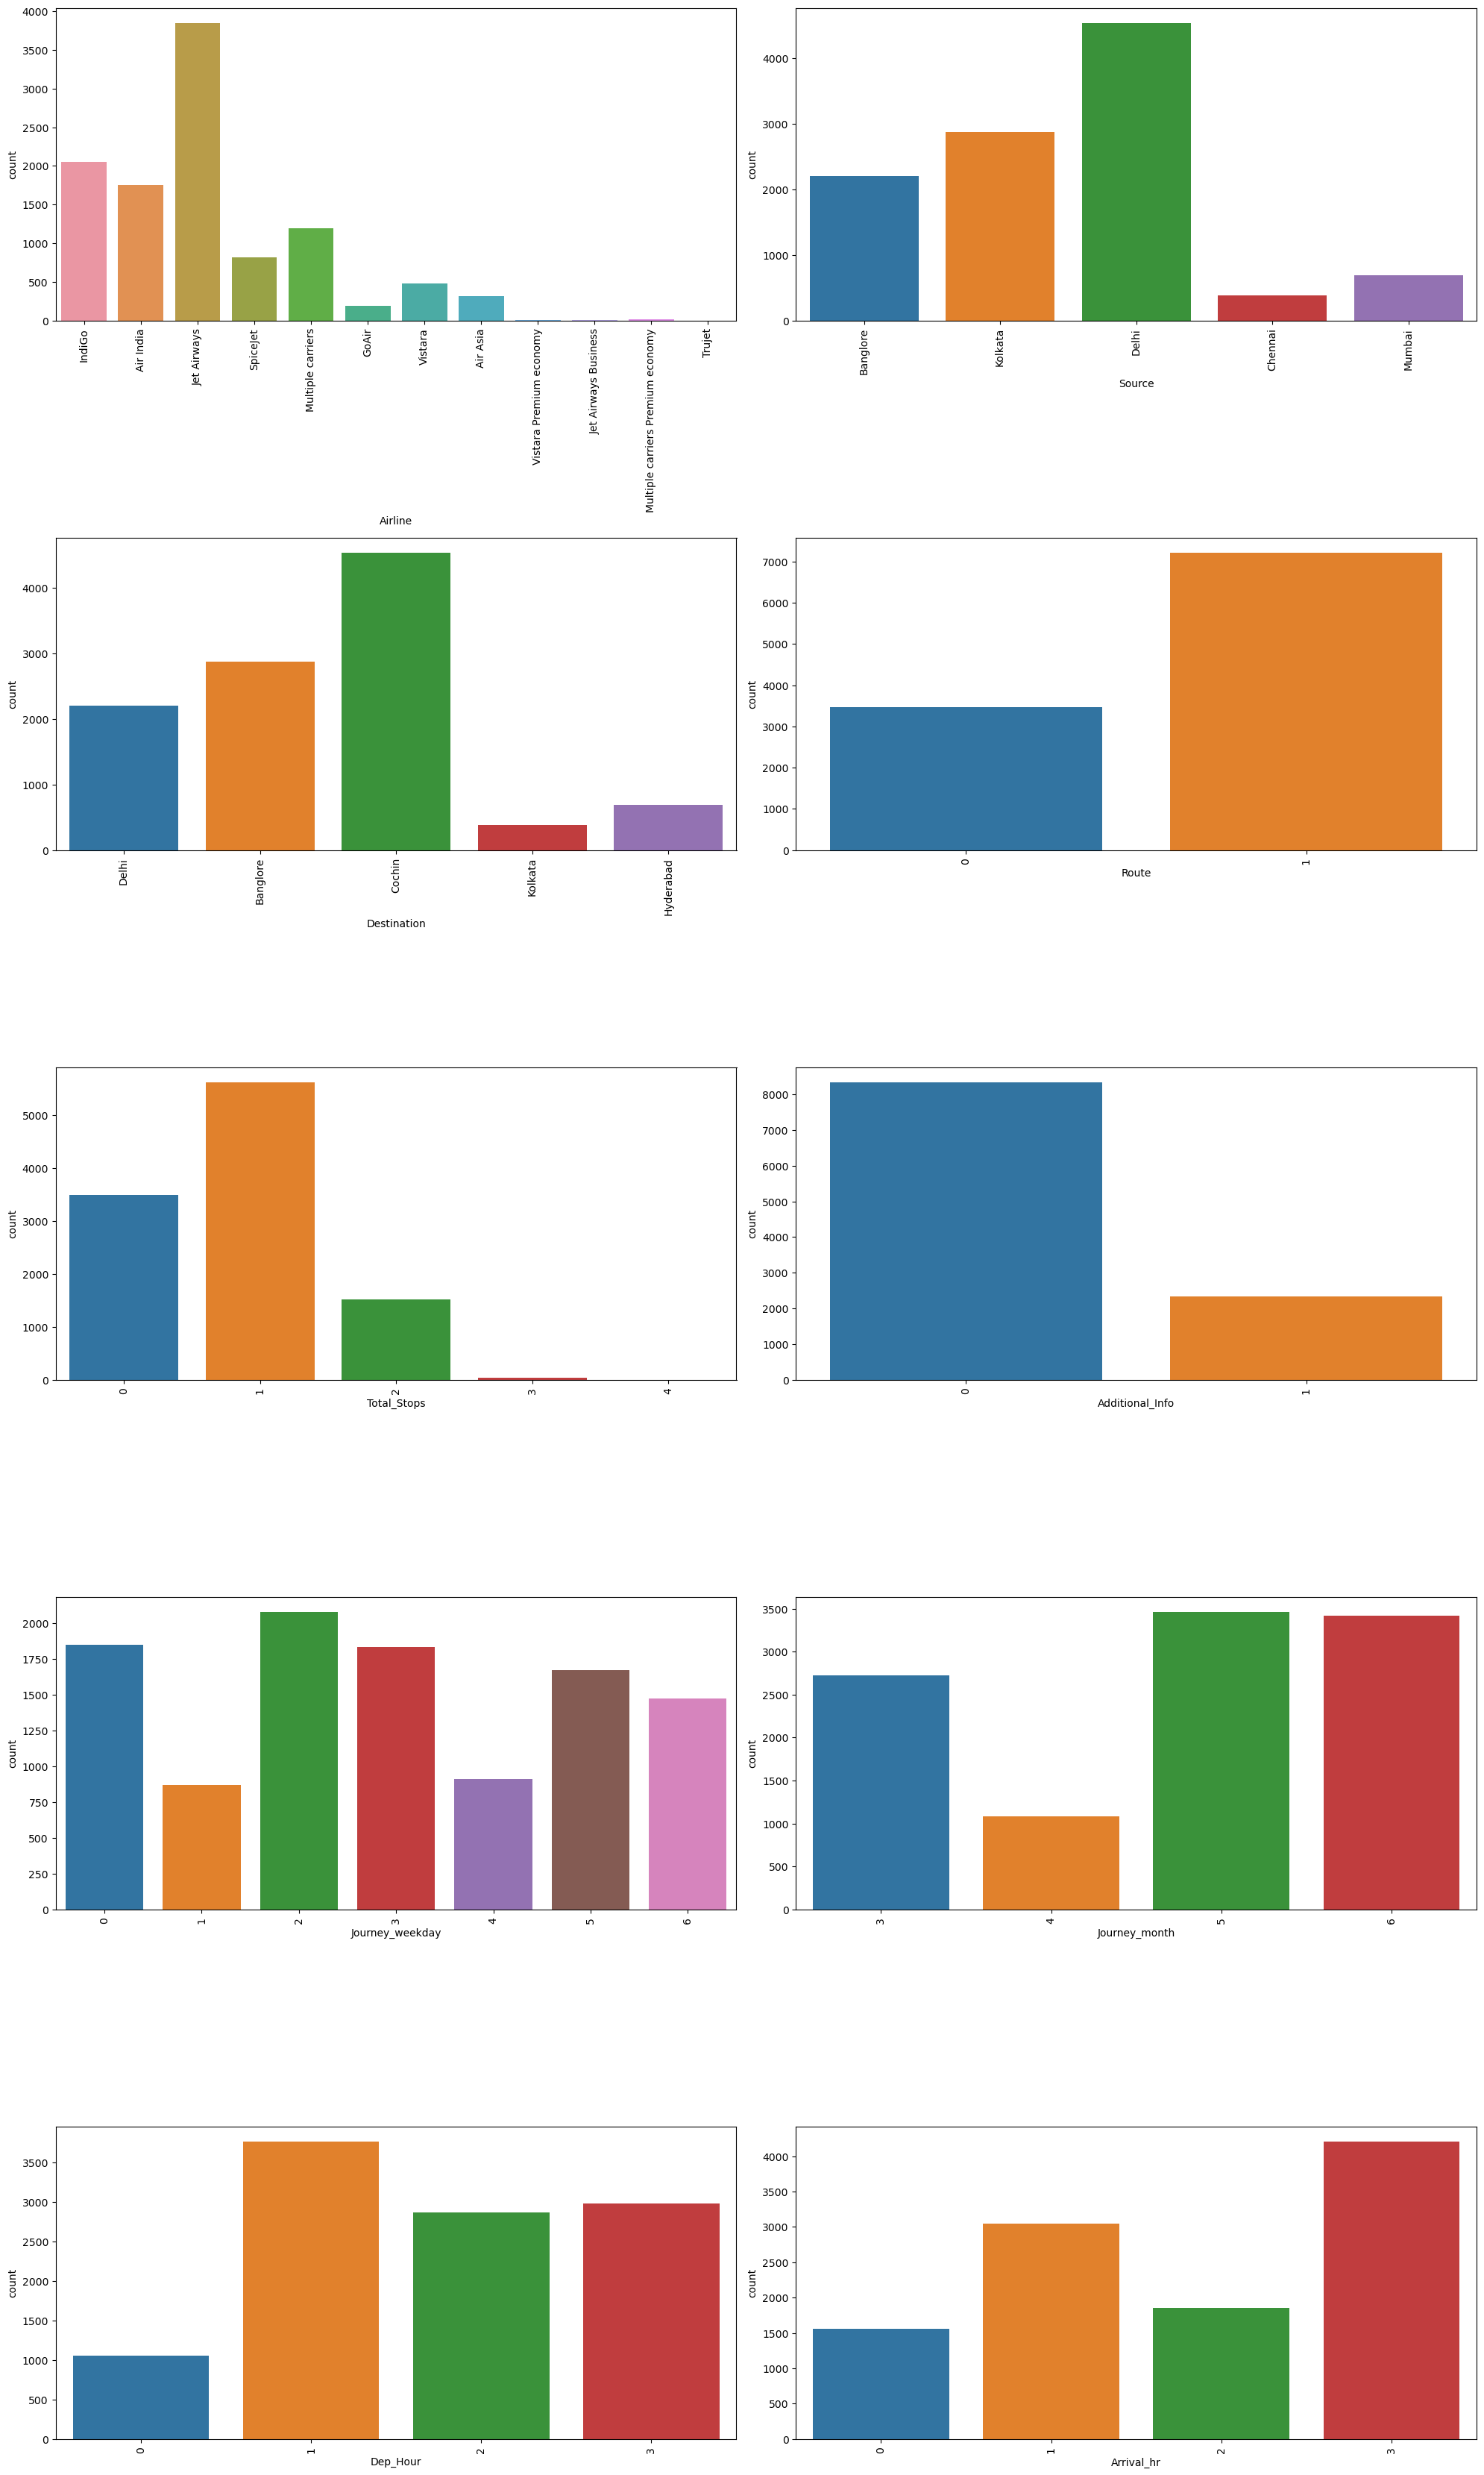

In [51]:

repeater=1

plt.figure(figsize=(20,40))
for i in flight_cat:
    plt.subplot(6,2,repeater)
    sns.countplot(x=flight[i],data=flight)
    plt.xticks(rotation=90)
    repeater+=1
plt.tight_layout()
plt.show()


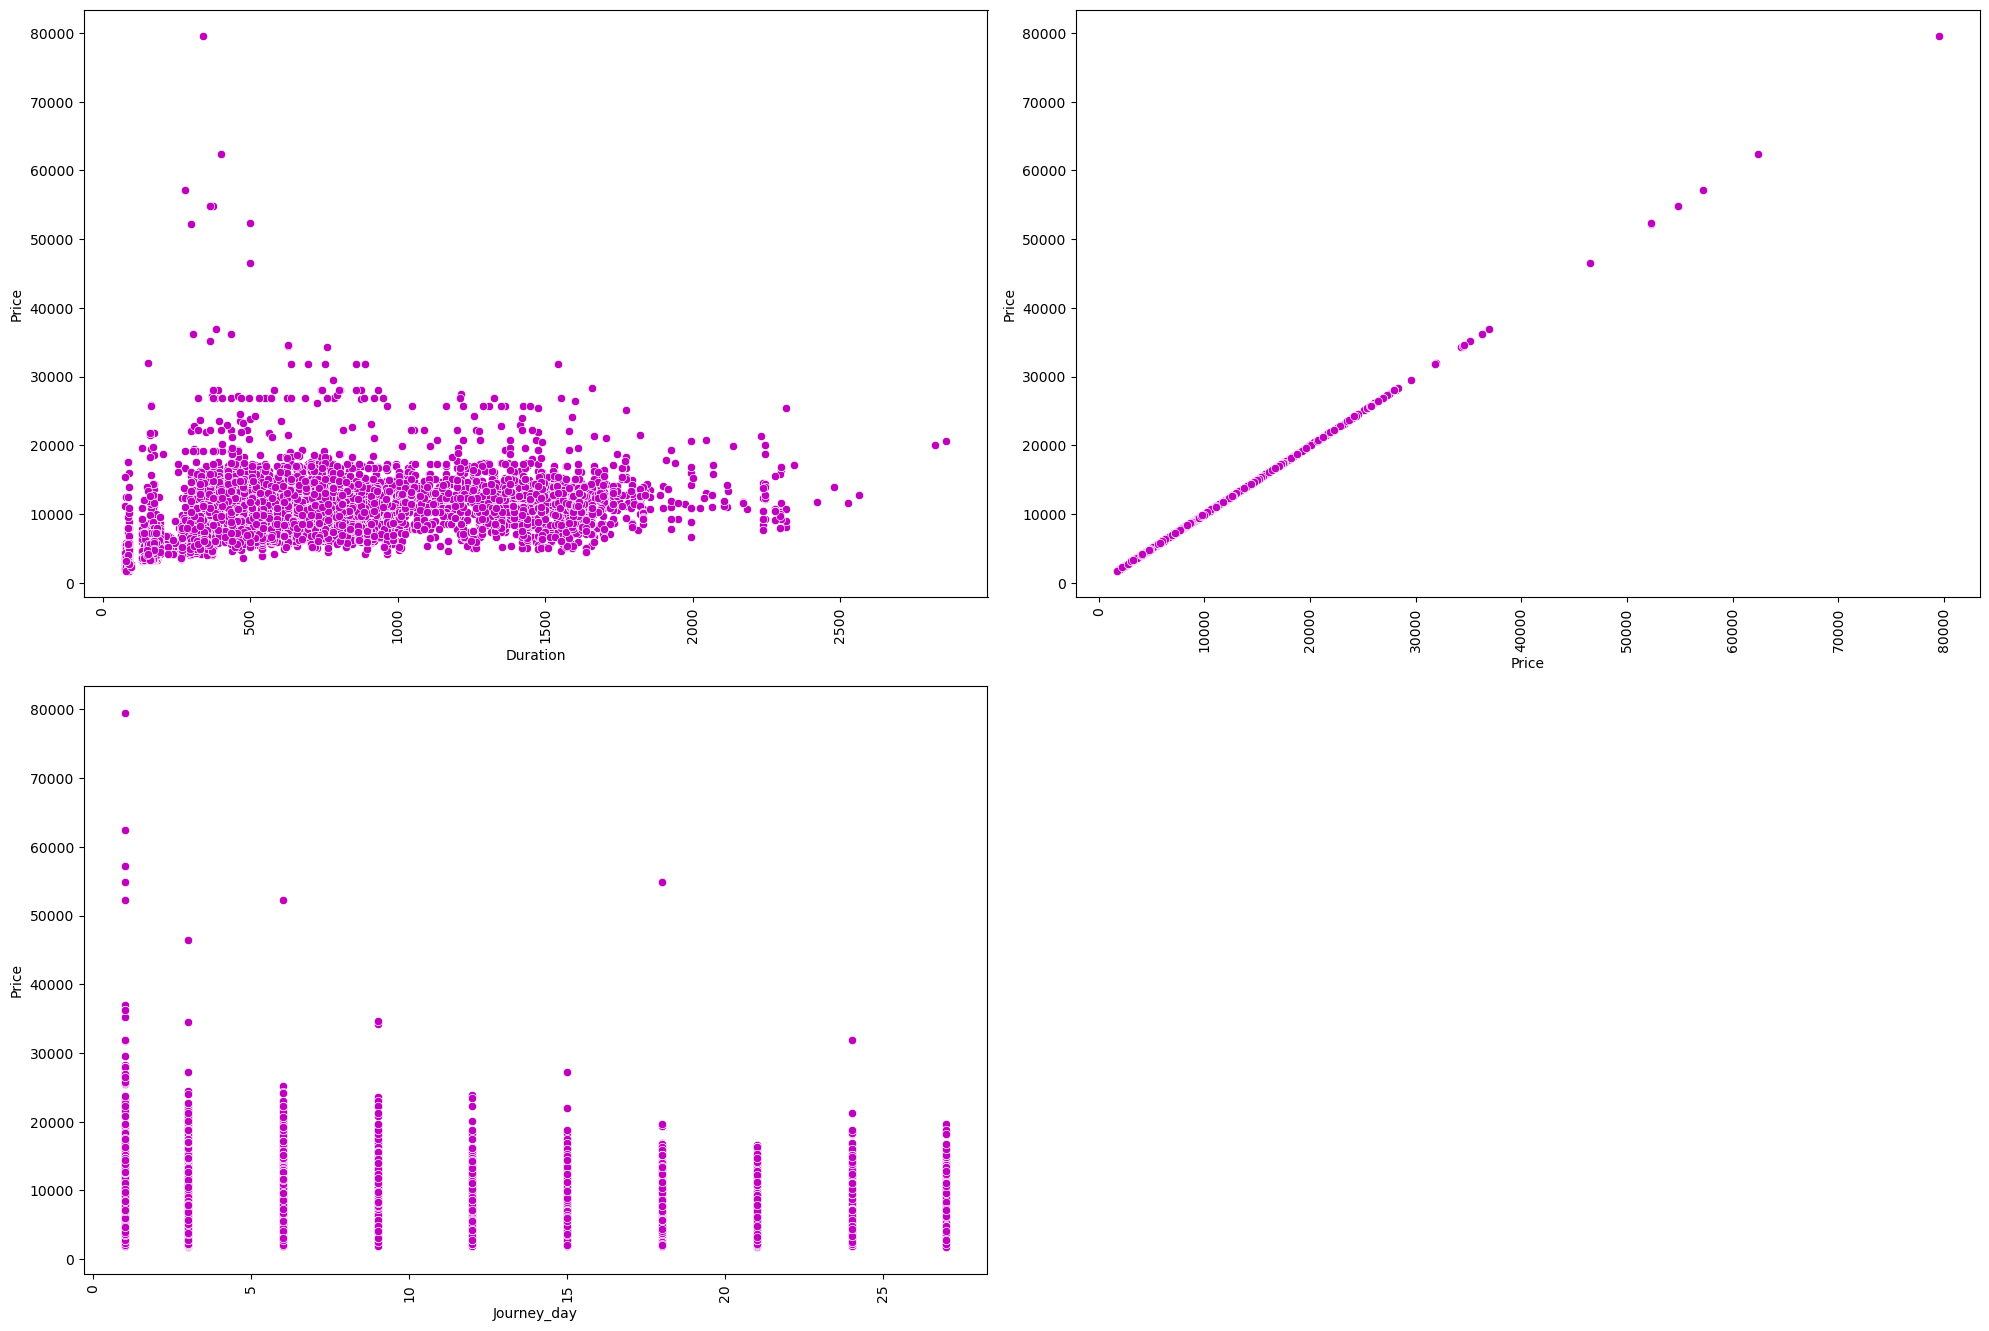

In [52]:
# bivarate (target vs number_cols)

repeater=1

plt.figure(figsize=(20,40))
for i in flight_num:
    plt.subplot(6,2,repeater)
    sns.scatterplot(x=flight[i],y=flight["Price"],data=flight ,color="m")
    plt.xticks(rotation=90)
    repeater+=1
plt.tight_layout()
plt.show()


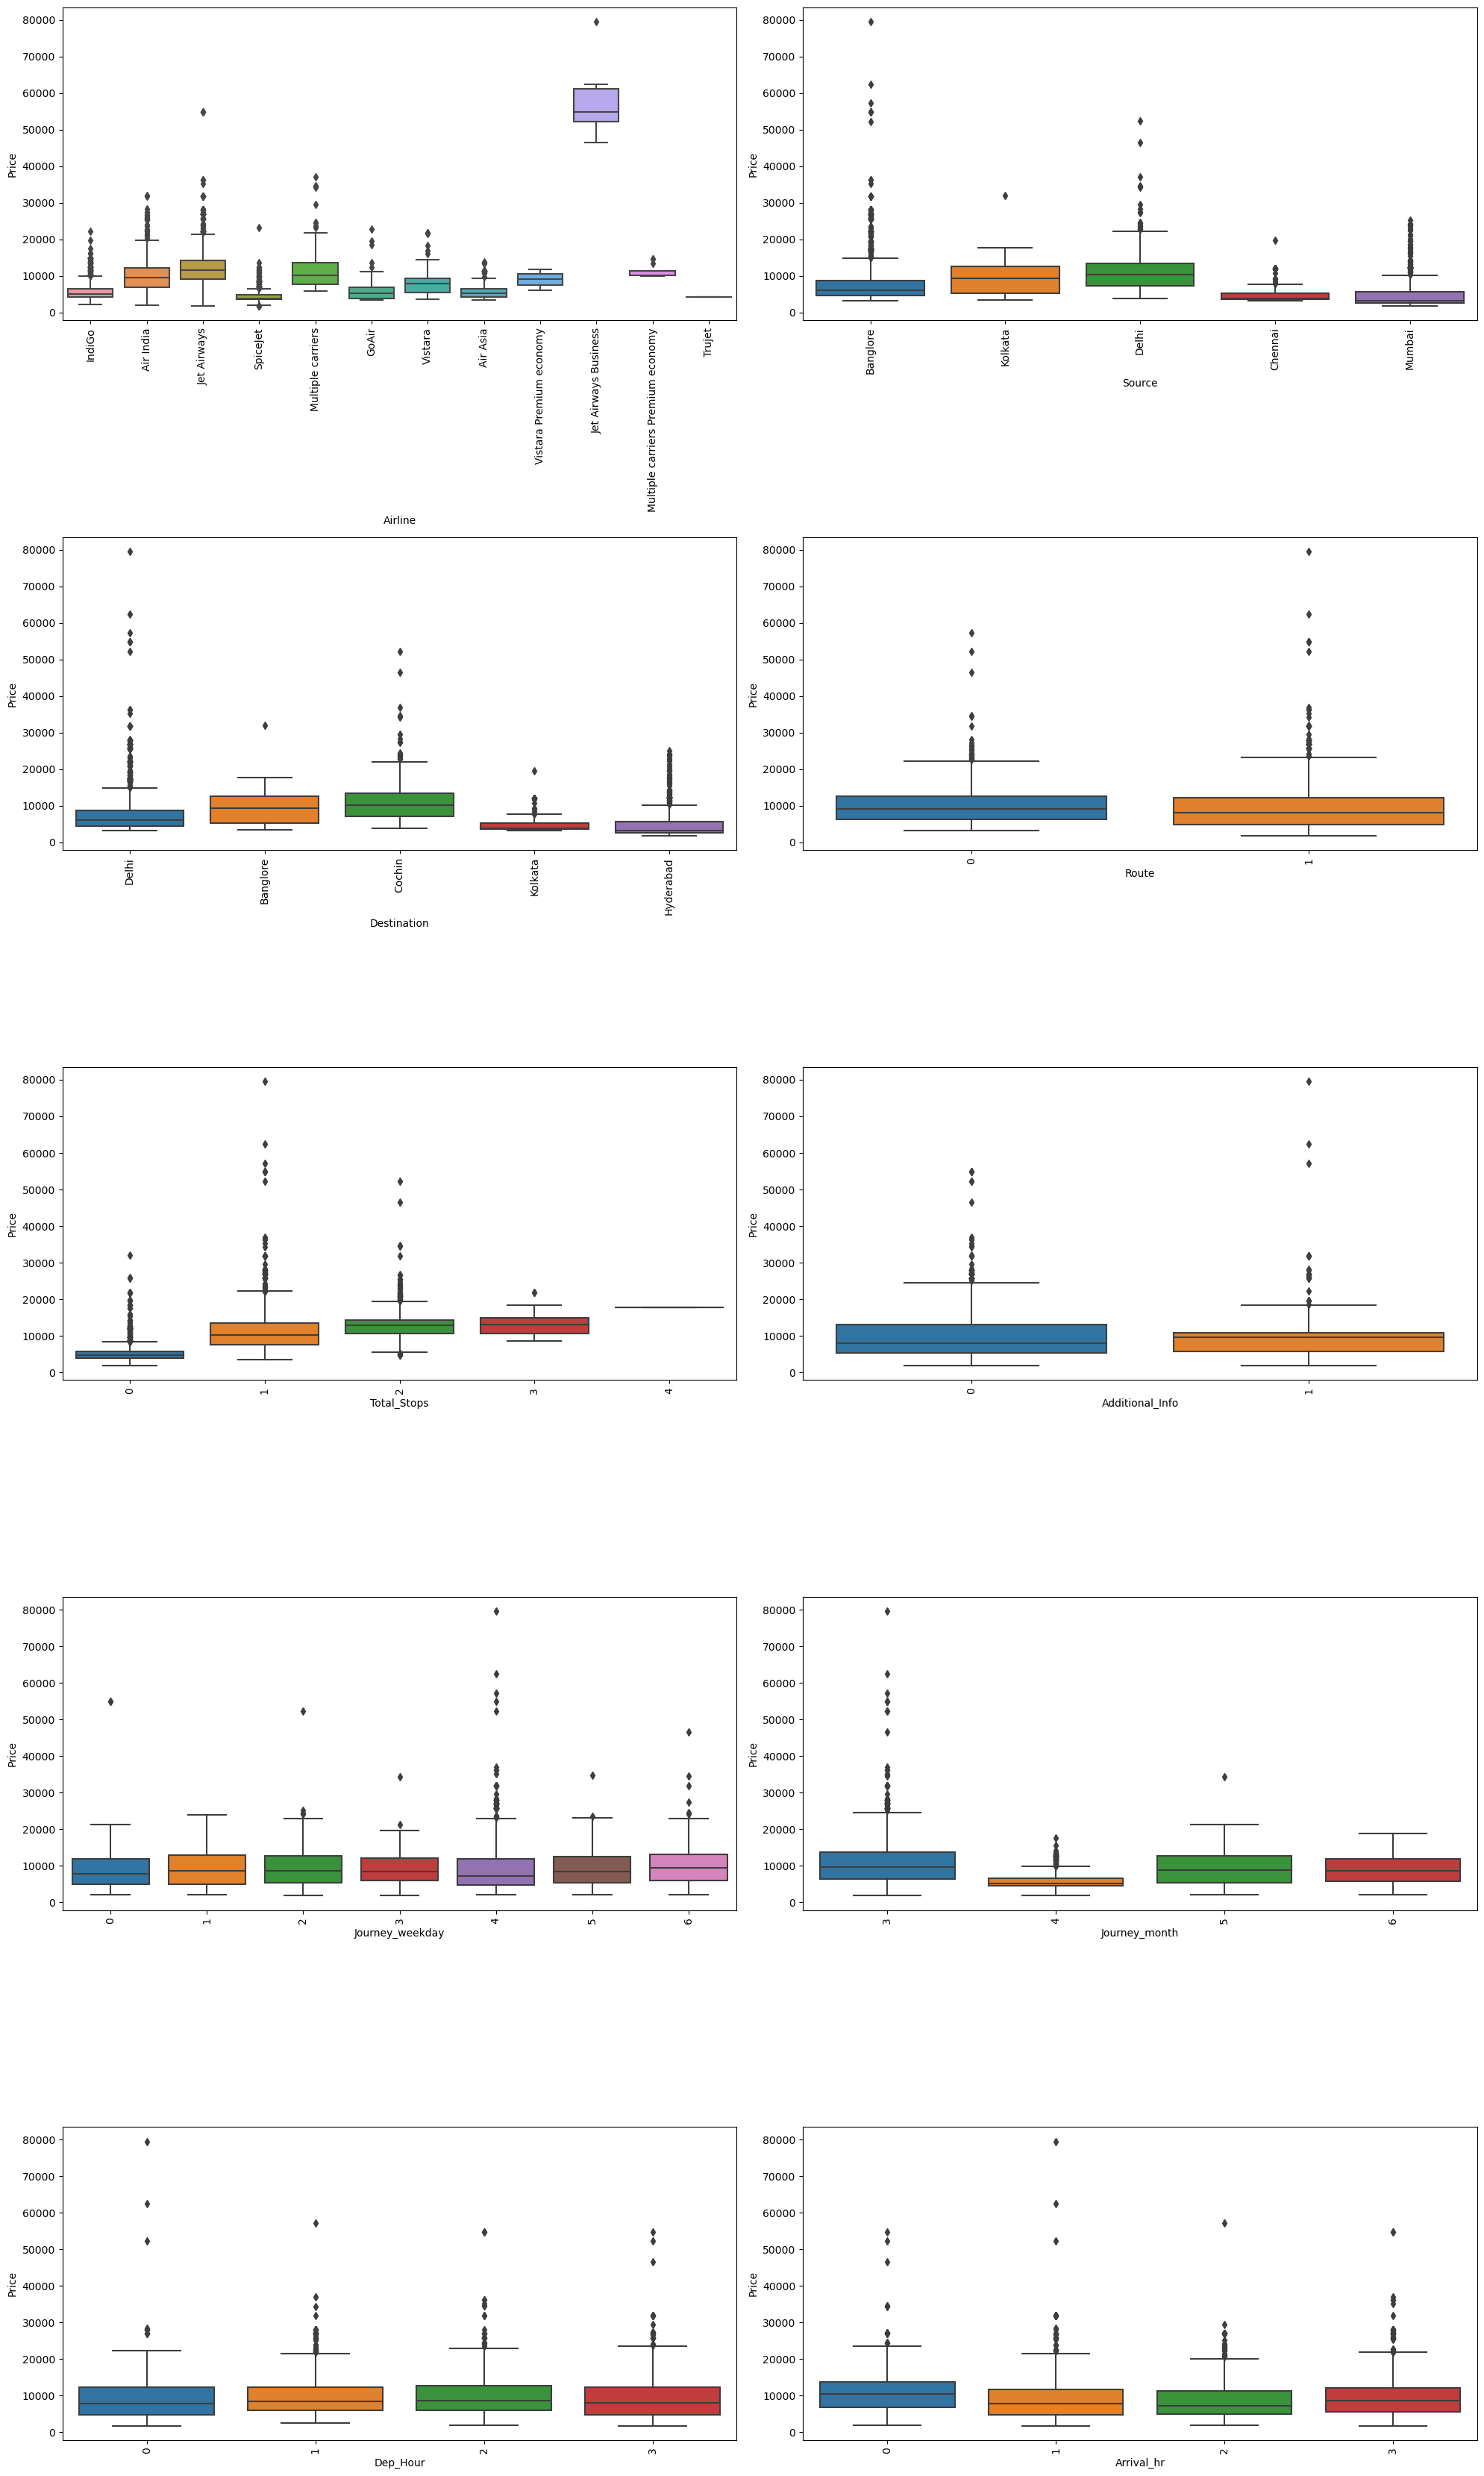

In [53]:
# bivarate (target vs number_cols)--- box plot

repeater=1

plt.figure(figsize=(20,40))
for i in flight_cat:
    plt.subplot(6,2,repeater)
    sns.boxplot(x=flight[i],y=flight["Price"],data=flight )
    plt.xticks(rotation=90)
    repeater+=1
plt.tight_layout()
plt.show()

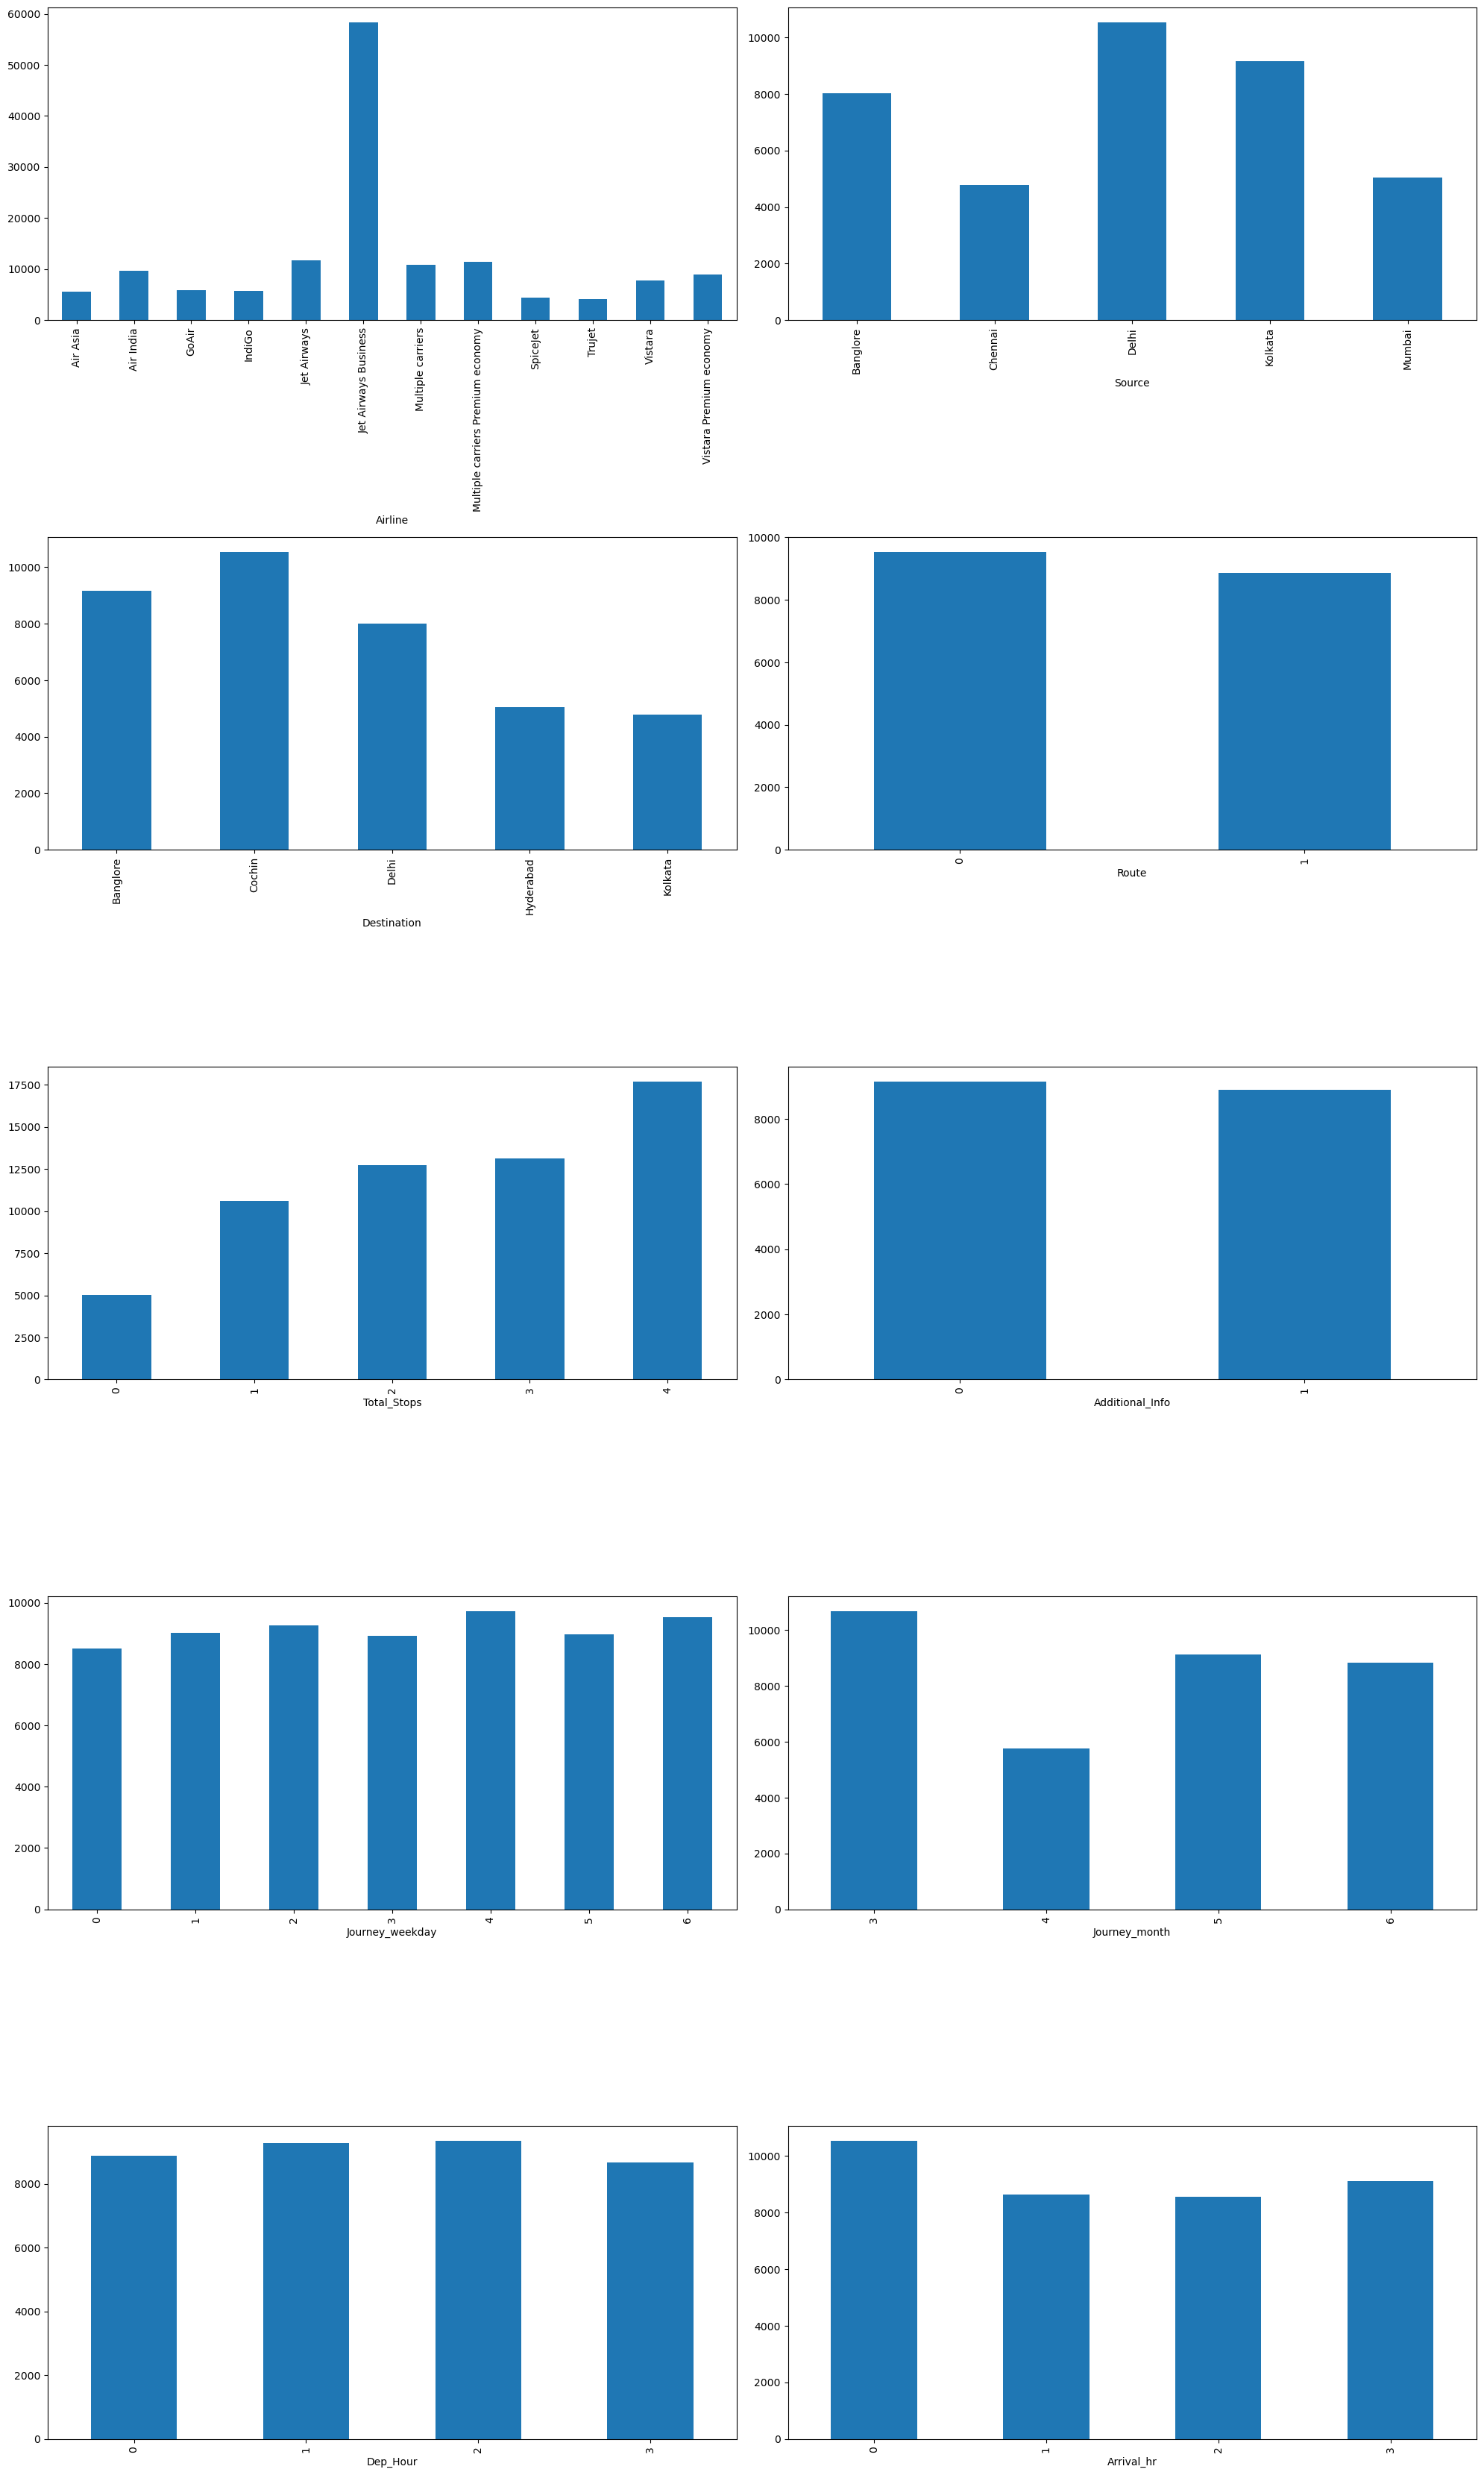

In [54]:
# comapre the mean
repeater=1

plt.figure(figsize=(20,40))
for i in flight_cat:
    plt.subplot(6,2,repeater)
    flight.groupby(by=i)["Price"].mean().plot(kind="bar")
    plt.xticks(rotation=90)
    repeater+=1
plt.tight_layout()
plt.show()

#### inferences
* jet airways(bussiness) have the highest price it is the bussiness class
* while scipyjet and tue* jet is the lowest price
* mean price of banglore has the highest avg(price) then from Delhi
* mean distination of cochin has the highest frequency and the bangulore and delhi
* total_stops 4 has the highest frequency

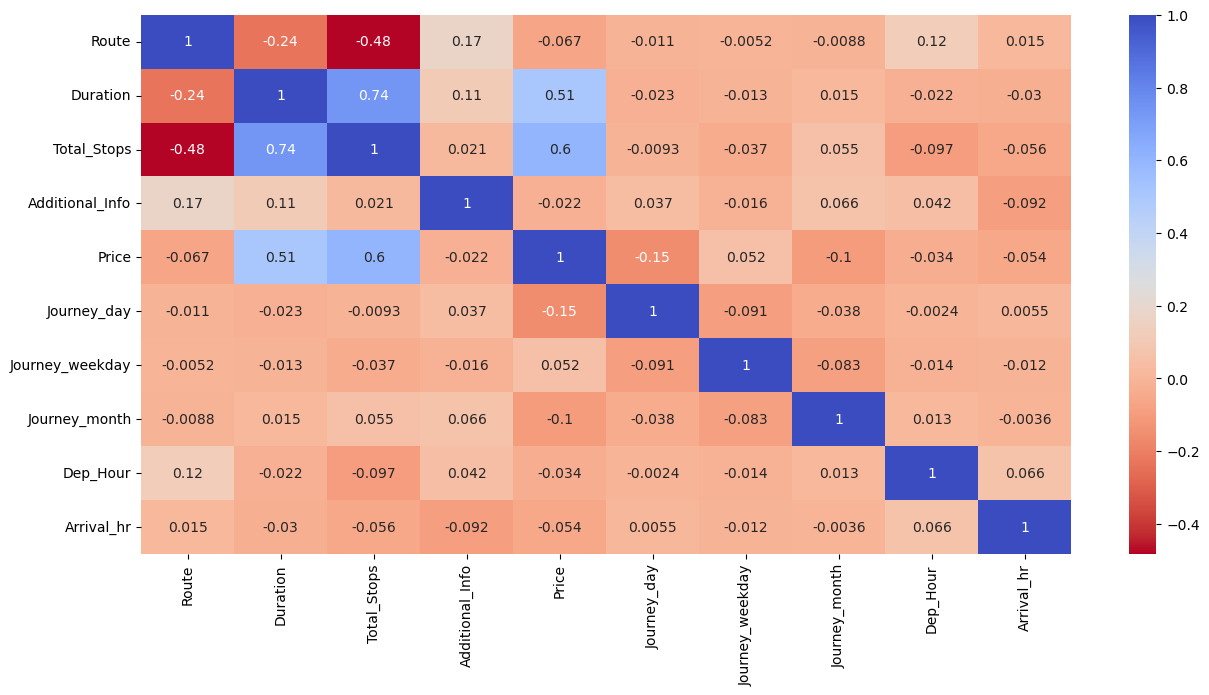

In [55]:
# correlation
plt.figure(figsize=(15,7))
sns.heatmap(flight.corr(),annot=True,cmap="coolwarm_r")
plt.show()

#  Missing value

In [56]:
flight.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_weekday    0
Journey_month      0
Dep_Hour           0
Arrival_hr         0
dtype: int64

In [57]:
# total stop
flight[flight["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr


In [58]:
flight[flight["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr


In [59]:
flight.drop(index=[9038],inplace=True)

# outlier treatment

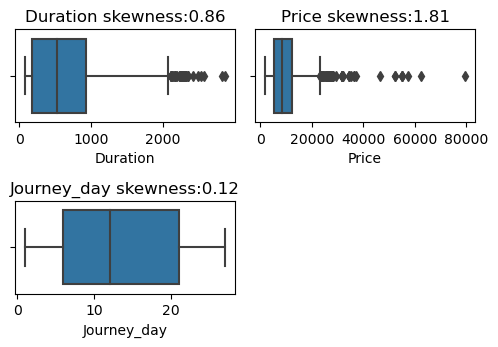

In [60]:
repeater=1

plt.figure(figsize=(5,10))
for i in flight_num:
    plt.subplot(6,2,repeater)
    sns.boxplot(x=flight[i],data=flight)
    plt.title(f'{i} skewness:{round(flight[i].skew(),2)}')
    repeater+=1
plt.tight_layout()
plt.show()


In [61]:
flight[flight["Price"]>40000]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr
657,Jet Airways Business,Banglore,Delhi,1,300,1,0,52229,1,4,3,0,1
1478,Jet Airways,Banglore,Delhi,1,365,1,0,54826,18,0,3,2,3
2618,Jet Airways,Banglore,Delhi,1,375,1,0,54826,18,0,3,3,0
2924,Jet Airways Business,Banglore,Delhi,1,340,1,1,79512,1,4,3,0,1
5372,Jet Airways Business,Banglore,Delhi,1,400,1,1,62427,1,4,3,0,1
5439,Jet Airways,Banglore,Delhi,1,365,1,0,54826,1,4,3,2,3
7351,Jet Airways Business,Delhi,Cochin,0,500,2,0,46490,3,6,3,3,0
9715,Jet Airways Business,Delhi,Cochin,0,500,2,0,52285,6,2,3,3,0
10364,Jet Airways Business,Banglore,Delhi,0,280,1,1,57209,1,4,3,1,2


In [62]:
# capping 
q3,q1=flight["Price"].quantile([0.75,0.25])
iqr=q3-q1
ul=q3+5*(iqr)
ul

47853.0

In [63]:
flight["Price"][flight["Price"]>ul]=ul

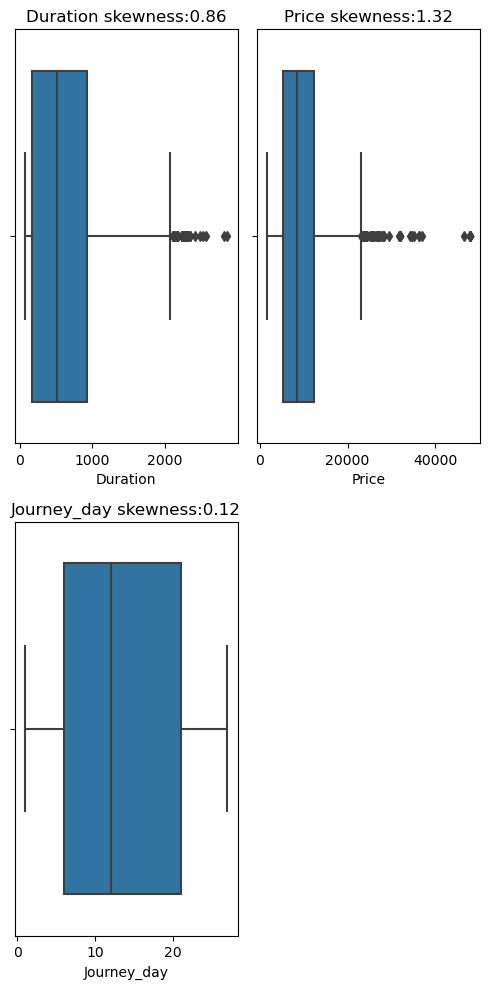

In [64]:
repeater=1

plt.figure(figsize=(5,10))
for i in flight_num:
    plt.subplot(2,2,repeater)
    sns.boxplot(x=flight[i],data=flight)
    plt.title(f'{i} skewness:{round(flight[i].skew(),2)}')
    repeater+=1
plt.tight_layout()
plt.show()

#  Encoding

In [65]:
# target


In [66]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr
0,IndiGo,Banglore,Delhi,1,170,0,0,3897,24,6,3,3,0
1,Air India,Kolkata,Banglore,0,445,2,0,7662,1,2,5,0,2
2,Jet Airways,Delhi,Cochin,0,1140,2,0,13882,9,6,6,1,0
3,IndiGo,Kolkata,Banglore,0,325,1,0,6218,12,6,5,2,3
4,IndiGo,Banglore,Delhi,0,285,1,0,13302,1,4,3,2,3


#  train test split

In [67]:
x=flight.drop("Price",axis=1)
y=flight["Price"]


In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,
                                              random_state=1)


In [69]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8544, 12) (2136, 12) (8544,) (2136,)


#  catboast

In [70]:
import category_encoders as ce

In [71]:
cat_e=ce.CatBoostEncoder()
for i in ["Airline","Source","Destination"]:
    x_train[i]=cat_e.fit_transform(x_train[i],y_train)
    x_test[i]=cat_e.transform(x_test[i])

In [72]:
x_test["Airline"].value_counts()

11647.163881    796
5657.587070     405
9660.310449     345
10901.349206    242
4357.208067     163
7780.711230      80
5652.419890      64
5852.130522      38
11433.290994      2
41390.248654      1
Name: Airline, dtype: int64

In [73]:
x_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr
7930,9660.310449,7973.499712,7973.499712,1,170,0,0,9,1,4,3,3
8033,11647.163881,9158.181795,9158.181795,1,1630,1,0,6,3,6,3,3
9364,10901.349206,10560.768706,10560.768706,0,385,1,0,3,0,6,1,2
3836,11647.163881,7973.499712,7973.499712,1,610,1,0,18,0,3,3,1
8636,5657.587070,10560.768706,10560.768706,0,515,1,0,27,3,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3571,9660.310449,10560.768706,10560.768706,0,795,1,0,15,5,6,1,3
4474,5657.587070,10560.768706,10560.768706,0,300,1,0,3,6,3,0,1
7367,4357.208067,4763.423675,4763.423675,0,135,0,1,9,3,5,1,1
10358,7780.711230,4763.423675,4763.423675,0,140,0,0,21,4,6,2,3


In [74]:
flight.groupby(by="Destination")["Price"].mean()

Destination
Banglore      9158.389411
Cochin       10540.357883
Delhi         7980.648612
Hyderabad     5042.083333
Kolkata       4789.892388
Name: Price, dtype: float64

###  lets check the assumptions for linear regression model

**check before we fit the model**
* variable must be numeric
* there should be no multicolinearity
 
**checks after fitting the model**

* linear relation 
* Absence of autocorreltion
* errors terms must be homoscedastic
* erorrs terms must follows N(0,1)

###  lets check for multicolinearity

**from statsmodels.stats.outliers_influence import variance_inflation_factor** (vif) 

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
x_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_day        0
Journey_weekday    0
Journey_month      0
Dep_Hour           0
Arrival_hr         0
dtype: int64

In [77]:
# add constant to the x_train
import statsmodels.api as sma
sma.add_constant(x_train)

,const,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_weekday,Journey_month,Dep_Hour,Arrival_hr
5929,1.0,9076.491924,9076.491924,9076.491924,1,170,0,0,21,4,6,3,0
9089,1.0,9076.491924,9076.491924,9076.491924,1,630,1,0,12,2,6,1,3
5398,1.0,9976.745962,9976.745962,9976.745962,1,490,1,1,27,3,6,1,3
9278,1.0,9076.491924,9076.491924,9076.491924,1,90,0,0,3,2,4,3,3
1595,1.0,9076.491924,8653.497308,8653.497308,0,765,1,0,18,5,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.0,11647.311535,9155.733113,9155.733113,1,890,1,0,9,6,6,3,1
7814,1.0,11648.269493,7974.750137,7974.750137,1,180,0,1,24,0,6,1,1
905,1.0,5657.110803,10561.910588,10561.910588,0,455,1,0,18,5,5,1,2
5192,1.0,11646.343758,9158.076370,9158.076370,1,1450,1,0,12,6,5,1,1


In [78]:
# vif
vif = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]

In [79]:
pd.DataFrame({"VIF":vif},index=x_train.columns).sort_values(by="VIF",ascending=False)

,VIF
Source,inf
Destination,inf
Airline,17.548403
Journey_month,14.920320
Total_Stops,9.823043
Duration,6.208676
Route,5.280317
Dep_Hour,4.108699
Arrival_hr,3.618452
Journey_day,3.454588


In [80]:
import statsmodels.api as sma

x_train_c=sma.add_constant(x_train)
y_train_c=sma.add_constant(y_train)
x_test_c=sma.add_constant(x_test)

In [81]:
# vif
vif = [variance_inflation_factor(x_train_c.values,i) for i in range(x_train_c.shape[1])]

In [82]:
pd.DataFrame({"VIF":vif},index=x_train_c.columns).sort_values(by="VIF",ascending=False)

,VIF
Source,inf
Destination,inf
const,65.692749
Total_Stops,4.147298
Duration,2.390582
Route,1.727399
Airline,1.696764
Additional_Info,1.158261
Journey_month,1.040441
Dep_Hour,1.027268


# Build a Base model

In [83]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa


#X_train_c
#y_train
base_model=sma.OLS(y_train,x_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:21:05   Log-Likelihood:                -79998.
No. Observations:                8544   AIC:                         1.600e+05
Df Residuals:                    8532   BIC:                         1.601e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2238.0555    247.353      9.048      0.000    1753.184    2722.927
Airline             0.7282      0.014     51.015      0.000       0.700       0.756
Source              0.0275      0.012      2.376      0.018       0.005       0.050
Destination         0.0275      0.012      2.376      0.018       0.005       0.050
Route            1372.1604     85.493     16.050      0.000    1204.574    1539.747
Duration           -0.1030      0.093     -1.111      0.266      -0.285       0.079
Total_Stops      3283.0893     91.722     35.794      0.000    3103.292    3462.886
Additional_Info -1961.4194     79.282    -24.740      0.000   -2116.832   -1806.007
Journey_day       -72.2275      3.639    -19.850      0.000     -79.360     -65.095
Journey_weekday   143.9979     15.374      9.367      0.000     113.862     174.134
Journey_month    -583.4667     26.804    -21.768      0.000    -636.008    -530.925
Dep_Hour           19.9951     31.767      0.629      0.529     -42.276      82.266
Arrival_hr        -67.5181     27.754     -2.433      0.015    -121.922     -13.114
==============================================================================
Omnibus:                     4566.485   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100620.339
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      19.284   Cond. No.                     2.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: >

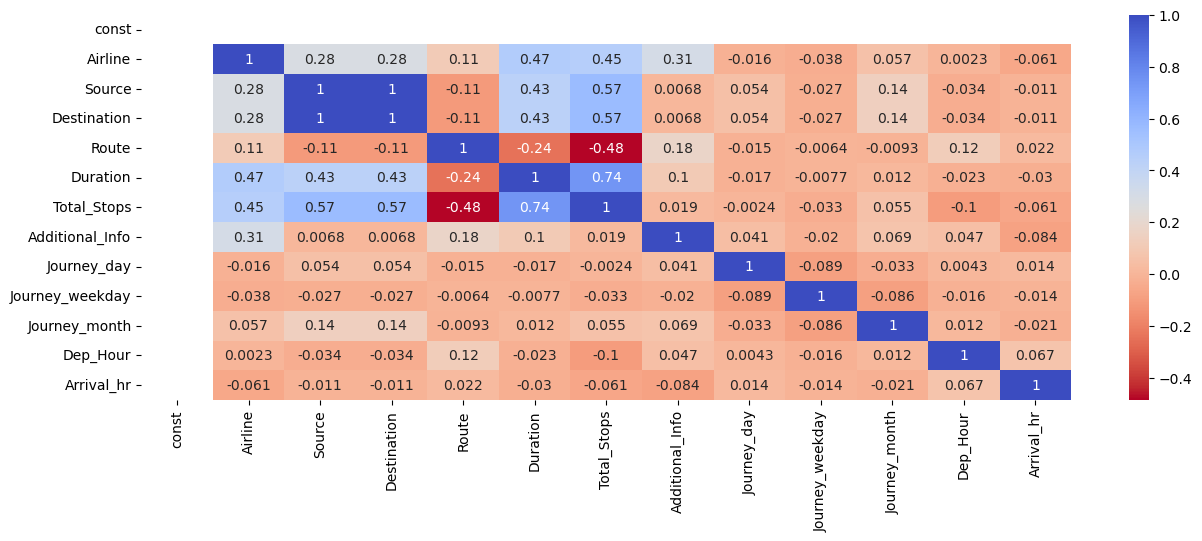

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(x_train_c.corr(),annot=True,cmap="coolwarm_r")

#  lets check model is linear is or not

In [85]:
import statsmodels.stats.api as smsa

In [86]:
p = smsa.linear_rainbow(base_model)[1]
p

3.5396002417939054e-11

In [87]:
if p<0.05:
    print("reject ho: the model is not linear")
else:
    print('accept ho: the model is  linear')

reject ho: the model is not linear


# check for autocorrelation


# check for heteroscedasticity

In [88]:
# residual plot to check the heteroscedascity

y_pred_train=base_model.predict(x_train_c)

<Axes: xlabel='Price'>

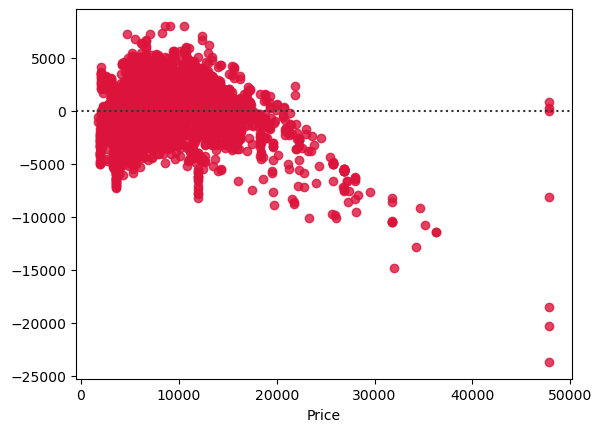

In [89]:
sns.residplot(x=y_train,y=y_pred_train,color="crimson")

#  Normality of residuals

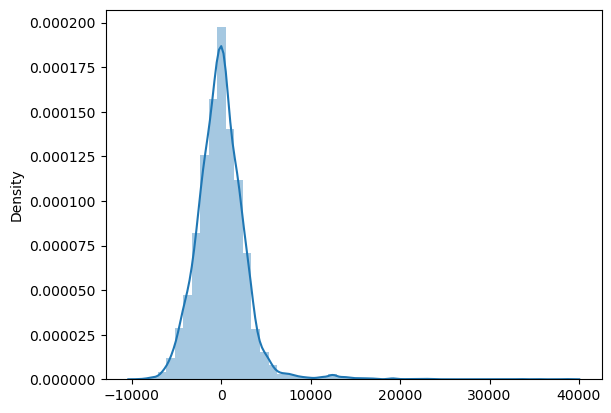

In [90]:
sns.distplot(base_model.resid)
plt.show()

In [91]:
from statsmodels.graphics.gofplots import qqplot # for QQ-plot

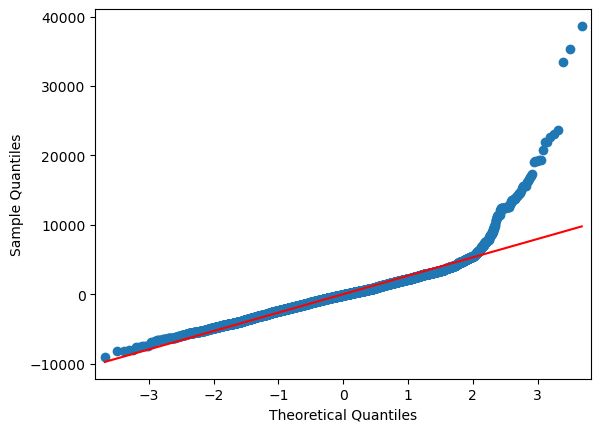

In [92]:
qqplot(base_model.resid,line="r")
plt.show()

In [93]:
flight["Price"].describe()

count    10680.000000
mean      9078.837360
std       4528.104222
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      47853.000000
Name: Price, dtype: float64

# validate the base model

In [94]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [95]:
def validation(fitted_model,xtrain,ytrain,xtest,ytest):
    y_pred_test=fitted_model.predict(xtest)
    r2=r2_score(ytest,y_pred_test)
    print("R2:",r2)
    n=xtrain.shape[0]
    k=xtrain.shape[0]
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print("Adj R2:",adj_r2)
    print("MSE:",mean_squared_error(ytest,y_pred_test))
    print("RMSE:",np.sqrt(mean_squared_error(ytest,y_pred_test)))
    print("MAE:",mean_absolute_error(ytest,y_pred_test))
    print("MAPE:",mean_absolute_percentage_error(ytest,y_pred_test))  
    residuals = ytest - y_pred_test
    
    # Plotting residuals
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.title('Residual Plot')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.show()

R2: 0.6170606503387412
Adj R2: 3272.4508641561333
MSE: 7699495.750804726
RMSE: 2774.7965242166365
MAE: 1949.4273202313875
MAPE: 0.2599555328980015


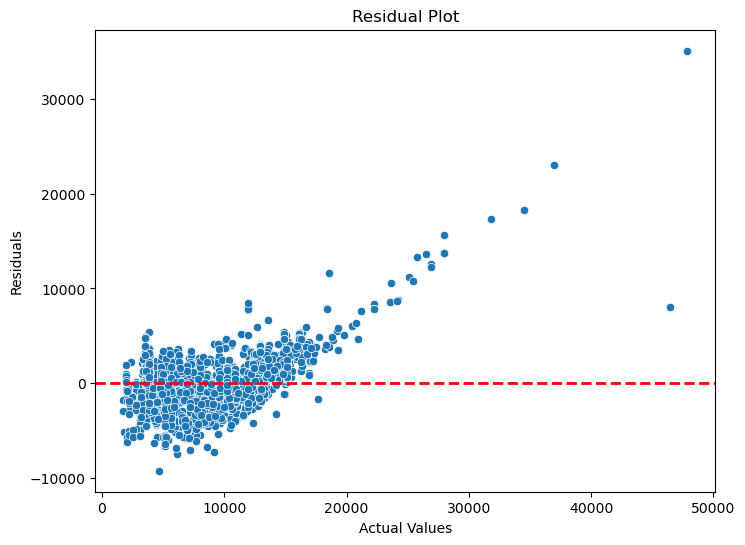

In [96]:
validation(base_model,x_train_c,y_train,x_test_c,y_test)

# lets try Sklearn models

In [97]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr=LinearRegression()
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()

In [98]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m = model.fit(xtrain,ytrain) # in skearn we use xtrain first
    print('%s'%model)
    print('Train parameters:')
    validation(m,xtrain,ytrain,xtrain,ytrain)
    print()
    print('Test parameters:')
    validation(m,xtrain,ytrain,xtest,ytest)   

LinearRegression()
Train parameters:
R2: 0.6142677353279782
Adj R2: 3296.3107370930825
MSE: 7946337.69818229
RMSE: 2818.9249188622052
MAE: 1958.518515174667
MAPE: 0.2593115993431411


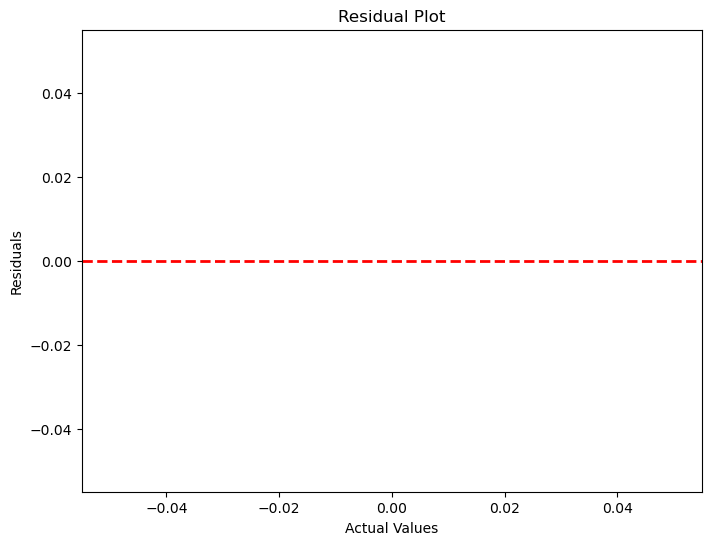


Test parameters:
R2: 0.6170606503387412
Adj R2: 3272.4508641561333
MSE: 7699495.750804726
RMSE: 2774.7965242166365
MAE: 1949.4273202313875
MAPE: 0.25995553289800144


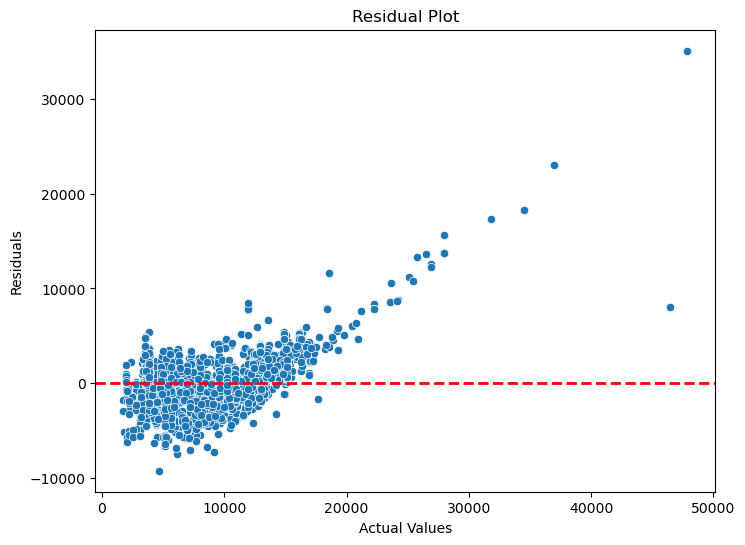

In [99]:
# linear regression
model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

SGDRegressor(eta0=0.1)
Train parameters:
R2: -1.477364248932068e+28
Adj R2: 1.2621122778626658e+32
MSE: 3.0434672700292694e+35
RMSE: 5.5167628823697594e+17
MAE: 5.405668010249116e+17
MAPE: 70894448003115.28


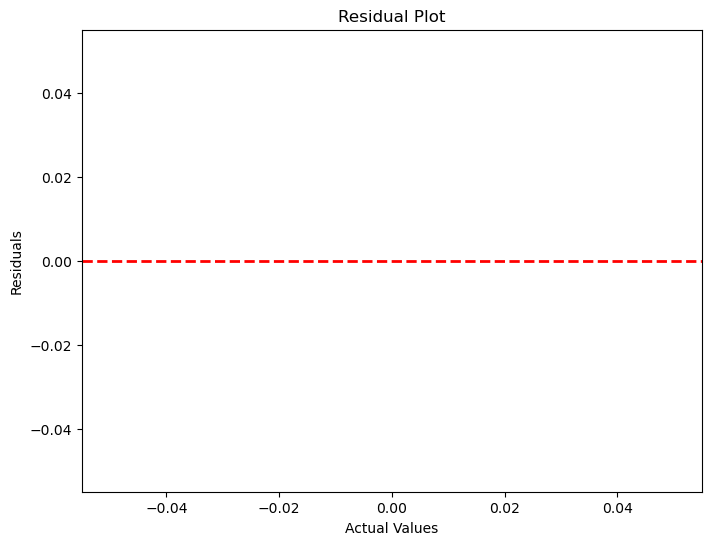


Test parameters:
R2: -1.5310124769009176e+28
Adj R2: 1.3079439590164539e+32
MSE: 3.0783005378671858e+35
RMSE: 5.548243449838143e+17
MAE: 5.436122201911266e+17
MAPE: 70784470852616.03


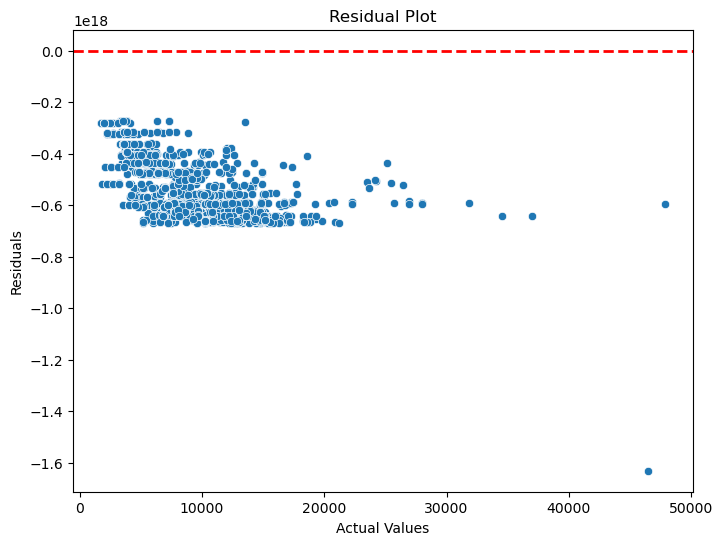

In [100]:
# stochastic Gradeint s=descent(scaled data)
model_validation(SGDRegressor(eta0=0.1),x_train,y_train,x_test,y_test)

Lasso(alpha=10)
Train parameters:
R2: 0.6140911771535772
Adj R2: 3297.81907357699
MSE: 7949974.9123996645
RMSE: 2819.5699871433703
MAE: 1955.9168700581333
MAPE: 0.25801187865242076


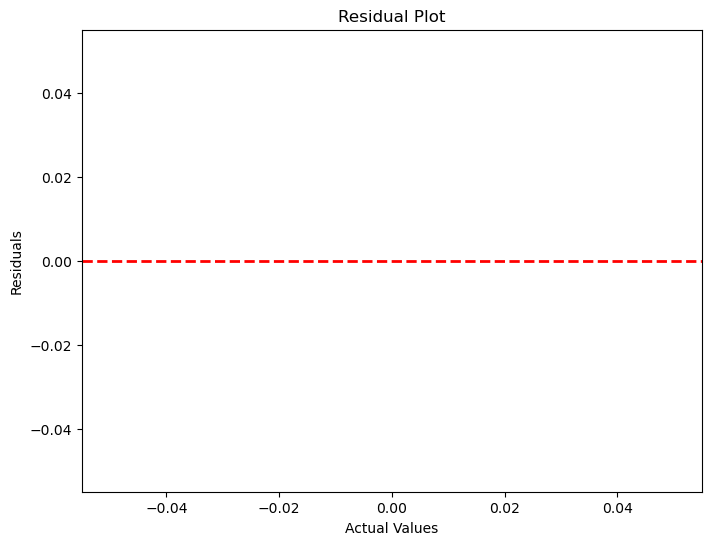


Test parameters:
R2: 0.6164234597372893
Adj R2: 3277.8943834643374
MSE: 7712307.300029613
RMSE: 2777.104121207848
MAE: 1947.7235170922595
MAPE: 0.2586808975353614


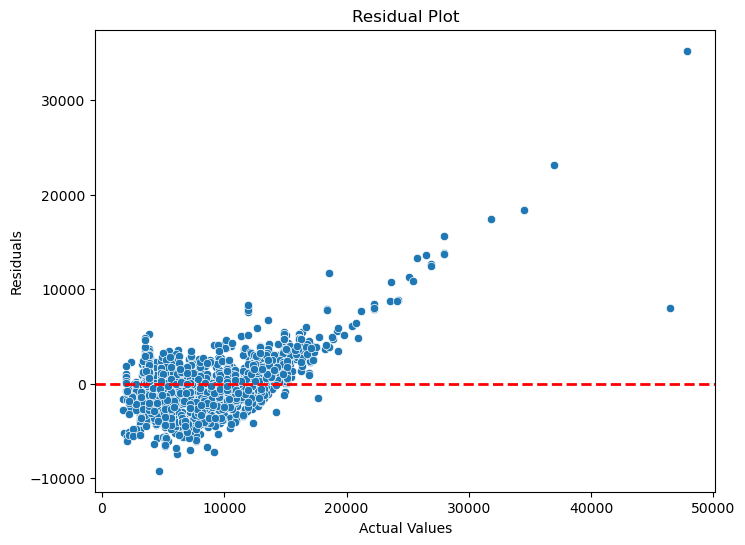

In [101]:
# regularization-- Regularization may affect the performance because model is underfitted 
# lasso
model_validation(Lasso(alpha=10),x_train,y_train,x_test,y_test)

In [102]:
pd.DataFrame({"coef":m.coef_},index=x_train.columns)

,coef
Airline,7.344671e-01
Source,7.034487e-02
Destination,2.497493e-18
Route,1.242506e+03
Duration,-4.324750e-02
Total_Stops,3.148964e+03
Additional_Info,-1.891834e+03
Journey_day,-7.248284e+01
Journey_weekday,1.410400e+02
Journey_month,-5.784047e+02


Ridge(alpha=10)
Train parameters:
R2: 0.6142562487865499
Adj R2: 3296.408866616504
MSE: 7946574.328471049
RMSE: 2818.9668902757708
MAE: 1957.8579754391362
MAPE: 0.25903568694111995


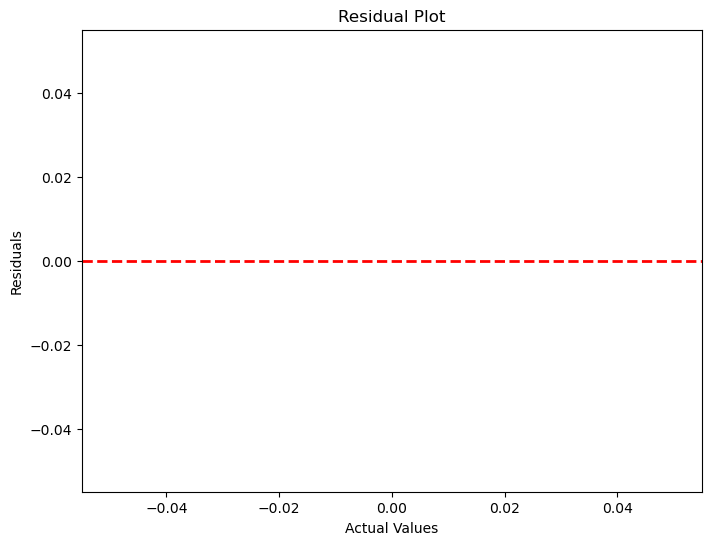


Test parameters:
R2: 0.6169309526004483
Adj R2: 3273.5588719343705
MSE: 7702103.493220747
RMSE: 2775.2663823894
MAE: 1948.9775256639032
MAPE: 0.25968650621611444


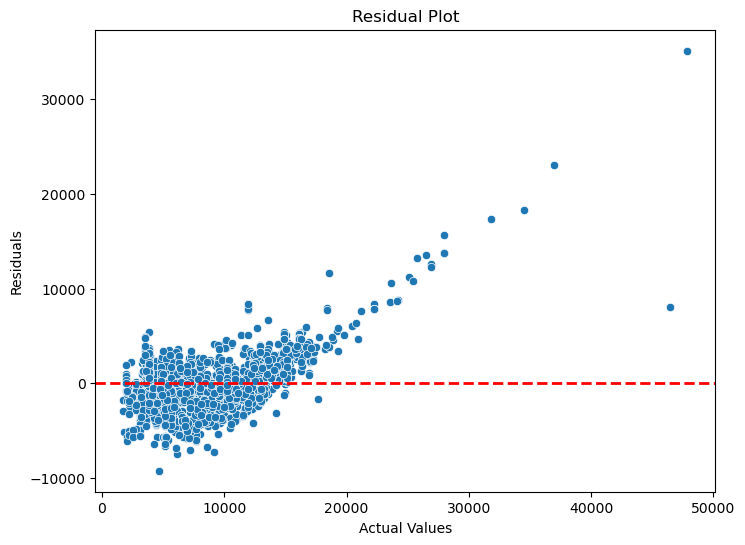

In [103]:
# Ridge
model_validation(Ridge(alpha=10),x_train,y_train,x_test,y_test)

## other Algorithms(other models)

KNeighborsRegressor(n_neighbors=3)
Train parameters:
R2: 0.7462832704989679
Adj R2: 2168.502020127317
MSE: 5226731.069561485
RMSE: 2286.2045117533744
MAE: 1468.2448892009988
MAPE: 0.16611229837162322


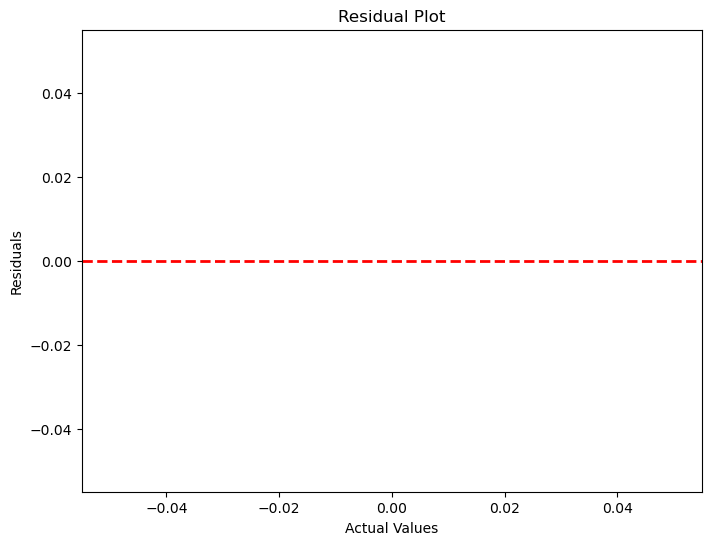


Test parameters:
R2: 0.5332114549595763
Adj R2: 3988.7745402803394
MSE: 9385393.33250104
RMSE: 3063.5589324347984
MAE: 2042.8199126092388
MAPE: 0.22998834904366333


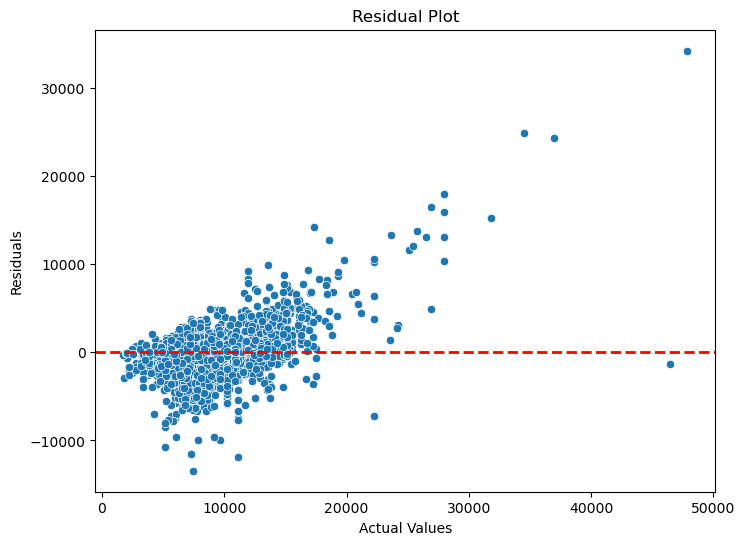

In [104]:
model_validation(KNeighborsRegressor(n_neighbors=3),x_train,y_train,x_test,y_test)

DecisionTreeRegressor(max_depth=8)
Train parameters:
R2: 0.8297391386617444
Adj R2: 1455.5385384127173
MSE: 3507485.4371530125
RMSE: 1872.8281921075975
MAE: 1170.8262969753605
MAPE: 0.1313156642188068


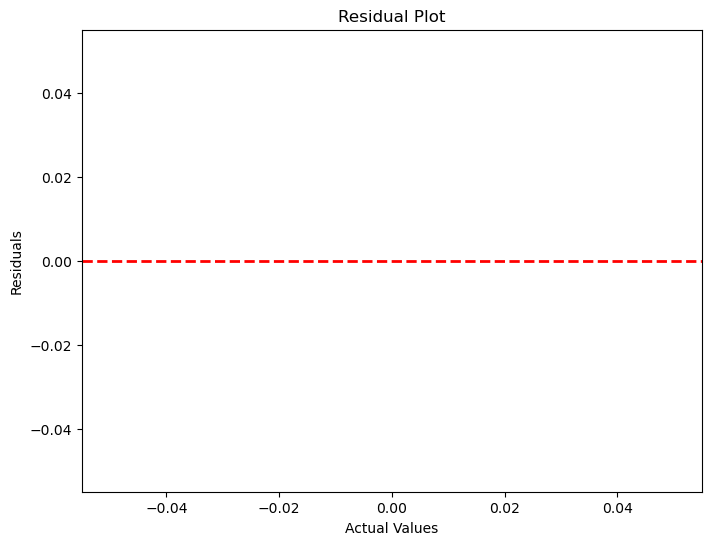


Test parameters:
R2: 0.7641625258332904
Adj R2: 2015.7595418062003
MSE: 4741820.426219843
RMSE: 2177.5721403020943
MAE: 1318.4801213674602
MAPE: 0.14818734267912323


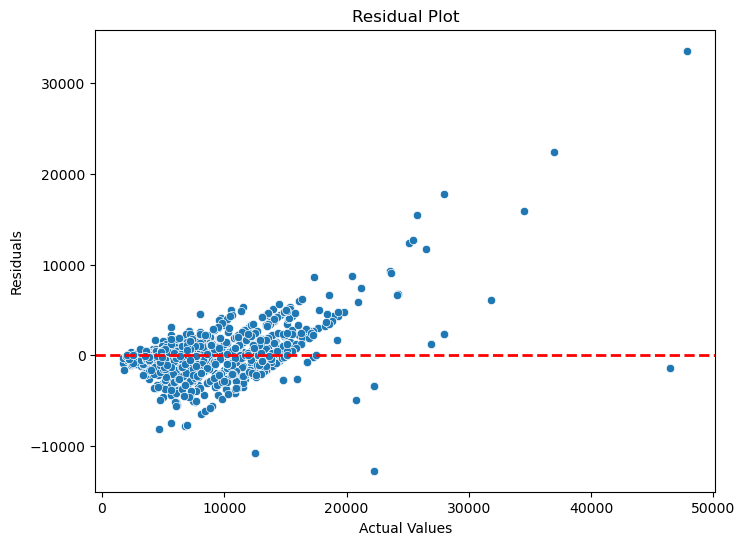

In [105]:
model_validation(DecisionTreeRegressor(max_depth=8),x_train,y_train,x_test,y_test)

GradientBoostingRegressor(max_depth=5, n_estimators=300)
Train parameters:
R2: 0.9502354738047695
Adj R2: 426.1383472858544
MSE: 1025181.8858699247
RMSE: 1012.5126596097082
MAE: 677.6649486933144
MAPE: 0.08241217279714044


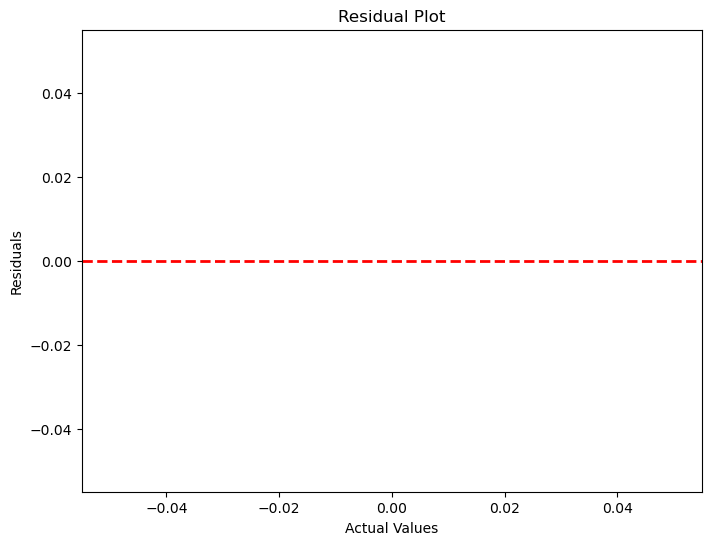


Test parameters:
R2: 0.855309286717644
Adj R2: 1237.0927635711678
MSE: 2909195.7592863464
RMSE: 1705.6364675060001
MAE: 993.5255156627445
MAPE: 0.12020800357323717


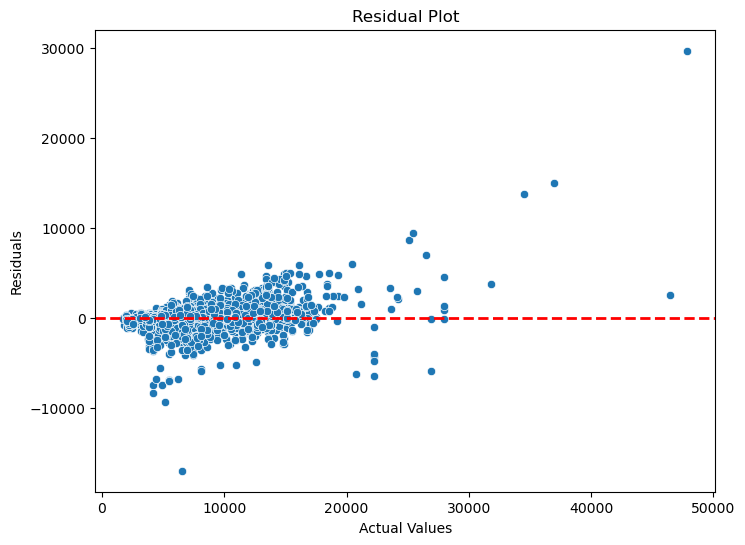

In [106]:
model_validation(GradientBoostingRegressor(n_estimators=300,max_depth=5),x_train,y_train,x_test,y_test)

RandomForestRegressor()
Train parameters:
R2: 0.9826785128526551
Adj R2: 148.9774646997678
MSE: 356833.99838113296
RMSE: 597.3558389947594
MAE: 304.4774180711611
MAPE: 0.03451208036312189


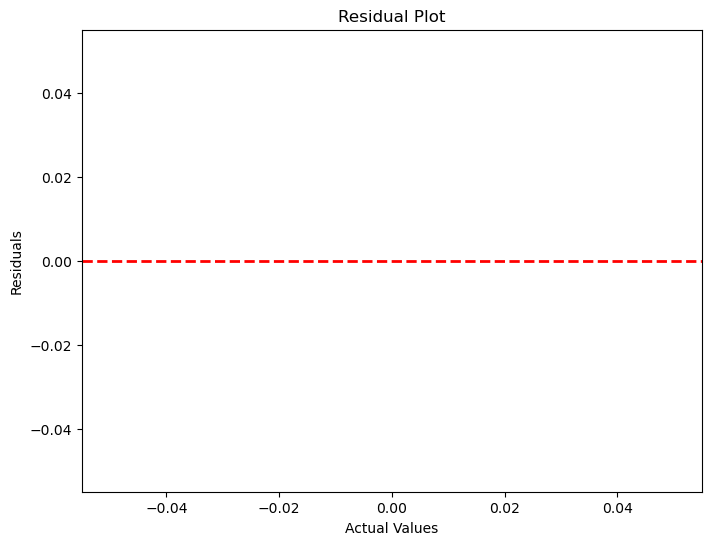


Test parameters:
R2: 0.8837063544313818
Adj R2: 994.4966140927054
MSE: 2338235.6258066013
RMSE: 1529.1290415810568
MAE: 819.4137687265918
MAPE: 0.09324689994680127


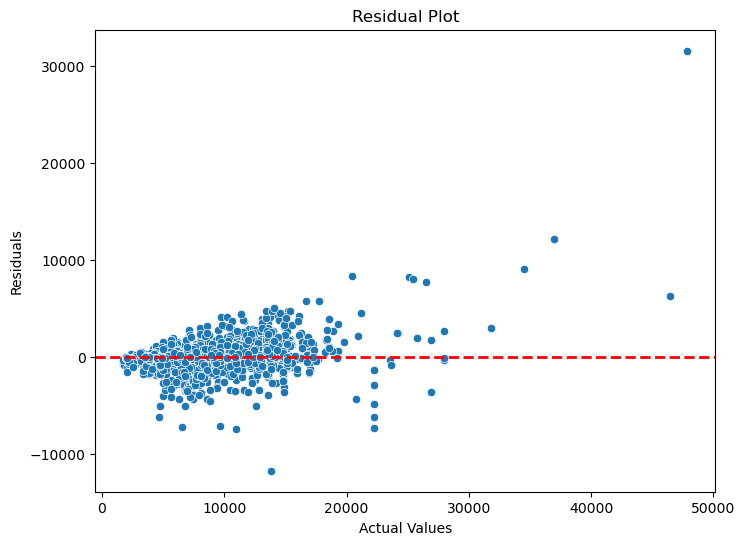

In [107]:
model_validation(RandomForestRegressor(n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,),x_train,y_train,x_test,y_test)

# kfold

In [108]:
from sklearn.model_selection import KFold, cross_val_score

In [109]:
kfcv = KFold(n_splits=5,random_state=1,shuffle=True)

In [110]:
model = GradientBoostingRegressor(n_estimators=300,max_depth=5)

In [111]:
score = cross_val_score(estimator=model,
                       X=x_train,y=y_train,
                       cv=kfcv,scoring='r2')
score

array([0.86042778, 0.83128667, 0.84113911, 0.88214048, 0.86209446])

In [112]:
print('Sum:',np.mean(score),'Std dev:',np.std(score))

Sum: 0.8554177006137529 Std dev: 0.017719883517966818


In [113]:
model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [114]:
model.predict(x_test)

array([ 5048.7933382 , 12810.67070867,  8495.00709611, ...,
        3463.96537259,  9721.42201026,  9182.08354088])

GradientBoostingRegressor(max_depth=5, n_estimators=300)
Train parameters:
R2: 0.9502354738047695
Adj R2: 426.1383472858544
MSE: 1025181.8858699247
RMSE: 1012.5126596097082
MAE: 677.6649486933144
MAPE: 0.08241217279714041


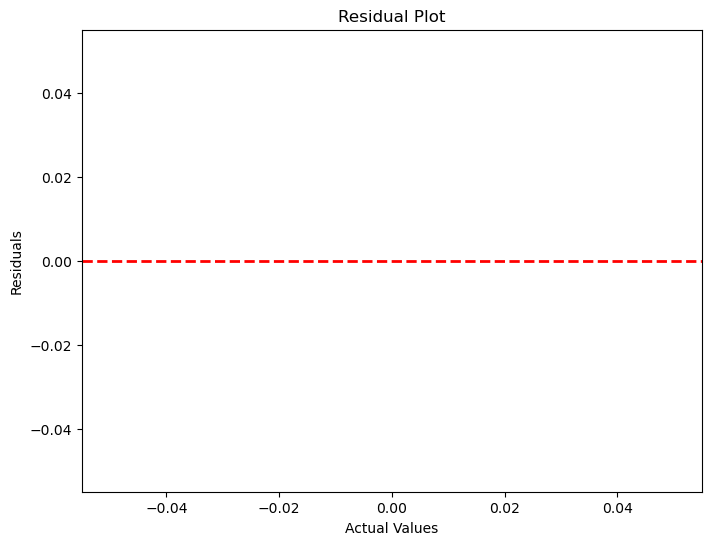


Test parameters:
R2: 0.8573284427249628
Adj R2: 1219.8431138006429
MSE: 2868597.990704154
RMSE: 1693.6935941025915
MAE: 989.1362015911416
MAPE: 0.11934097304982165


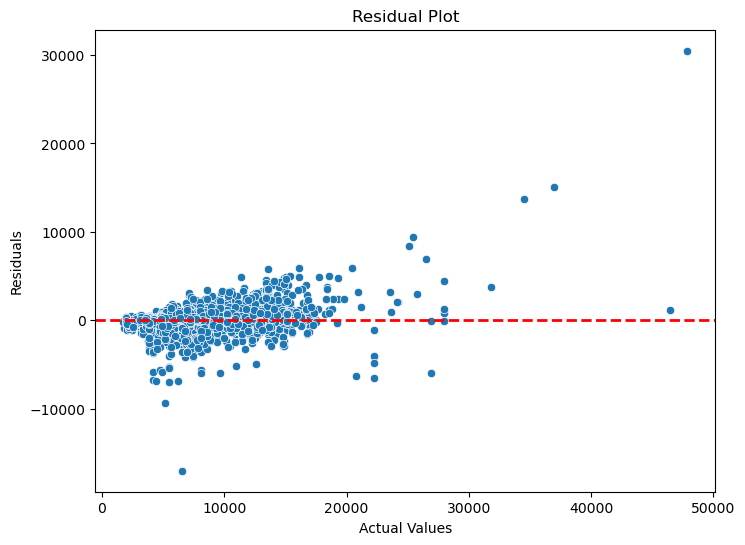

In [115]:
model_validation(model,x_train,y_train,x_test,y_test)

GradientBoostingRegressor(criterion='squared_error', max_depth=None,
                          n_estimators=300)
Train parameters:
R2: 1.0
Adj R2: 1.0
MSE: 2.2199402994806398e-16
RMSE: 1.4899464082579077e-08
MAE: 1.1918026662107046e-08
MAPE: 1.7430706394075295e-12


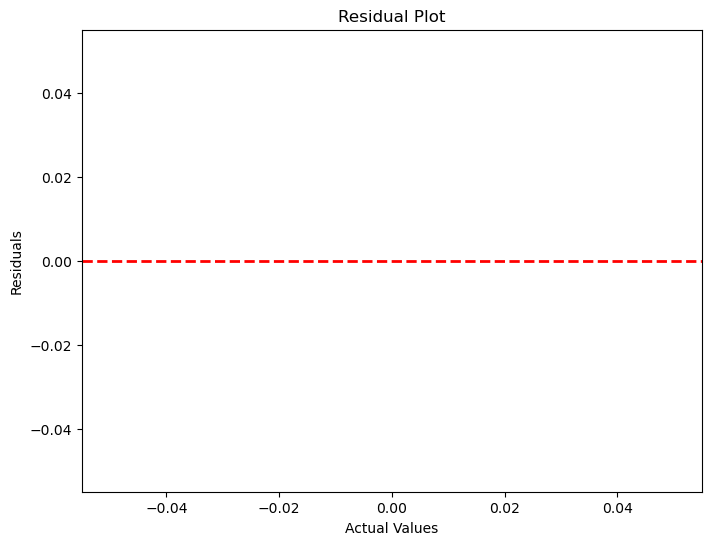


Test parameters:
R2: 0.7998840385478508
Adj R2: 1710.5906586857102
MSE: 4023592.7601380777
RMSE: 2005.8895184276919
MAE: 936.7576894544563
MAPE: 0.10855546764683739


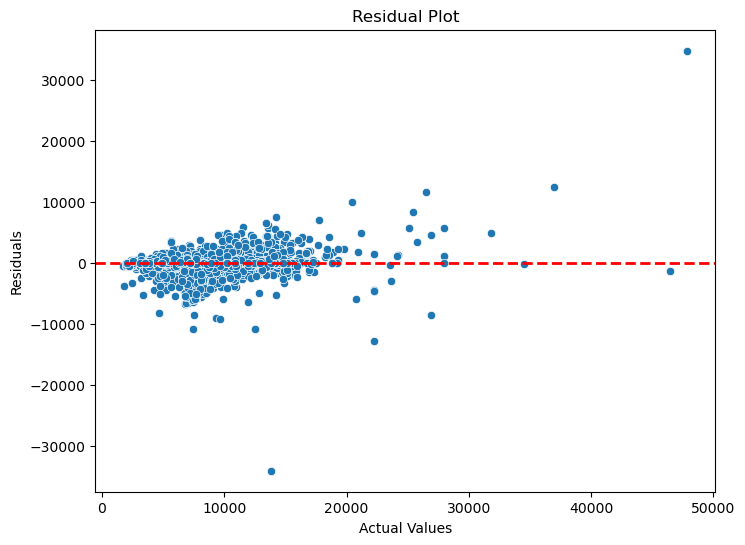

In [116]:
model_validation(GradientBoostingRegressor(n_estimators=300,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,),x_train,y_train,x_test,y_test)